In [318]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [319]:
features = pd.read_csv('features.csv')
stoes=pd.read_csv('stores.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [320]:
# combined_df=pd.concat([features,train], axis=1)
combined_df=features

In [321]:
correlation_matrix=combined_df.corr()
print(correlation_matrix)

                     Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Store         1.000000e+00    -0.020566    0.066682  -0.136967  -0.044223   
Temperature  -2.056605e-02     1.000000    0.101354  -0.124979  -0.321888   
Fuel_Price    6.668205e-02     0.101354    1.000000   0.066122  -0.193461   
MarkDown1    -1.369671e-01    -0.124979    0.066122   1.000000   0.021289   
MarkDown2    -4.422331e-02    -0.321888   -0.193461   0.021289   1.000000   
MarkDown3    -3.327926e-02    -0.077552   -0.057168  -0.089841  -0.053555   
MarkDown4    -5.173997e-03    -0.064194   -0.008546   0.810455  -0.046595   
MarkDown5    -1.196994e-02    -0.003241   -0.021926   0.085967  -0.008166   
CPI          -2.092824e-01     0.164426   -0.186696  -0.044327  -0.044896   
Unemployment  2.211525e-01     0.150890   -0.033360   0.020501  -0.001692   
IsHoliday    -4.186667e-16    -0.161906   -0.078238   0.152621   0.299448   

              MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  \
St

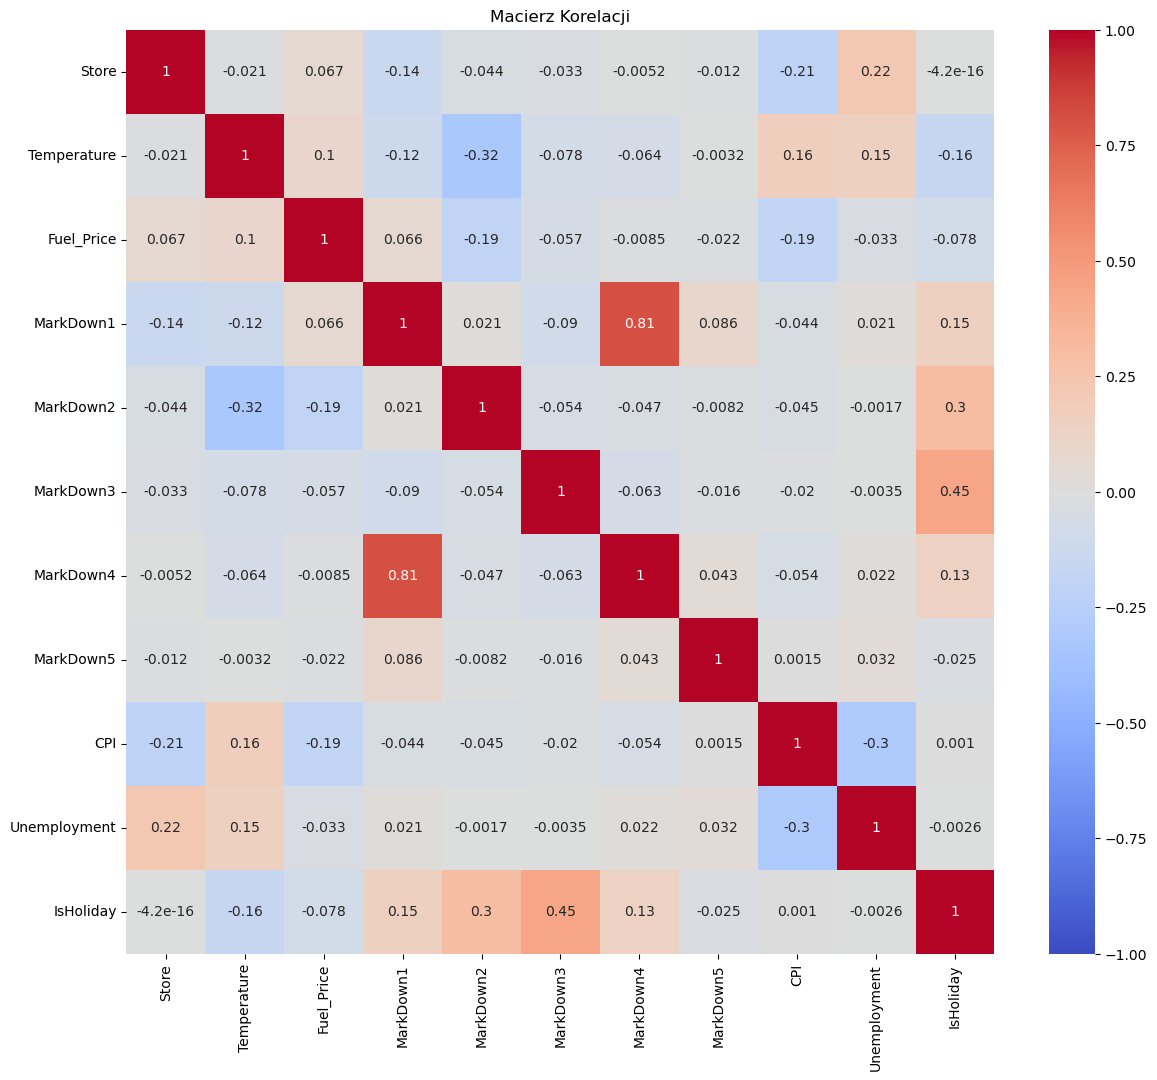

In [322]:
# Ustawienia dla wizualizacji
plt.figure(figsize=(14, 12))

# Wykres macierzy korelacji
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Dodaj tytuł
plt.title('Macierz Korelacji')

# Pokaż wykres
plt.show()

              Missing Values    Percent
Store                      0   0.000000
Date                       0   0.000000
Temperature                0   0.000000
Fuel_Price                 0   0.000000
MarkDown1               4158  50.769231
MarkDown2               5269  64.334554
MarkDown3               4577  55.885226
MarkDown4               4726  57.704518
MarkDown5               4140  50.549451
CPI                      585   7.142857
Unemployment             585   7.142857
IsHoliday                  0   0.000000


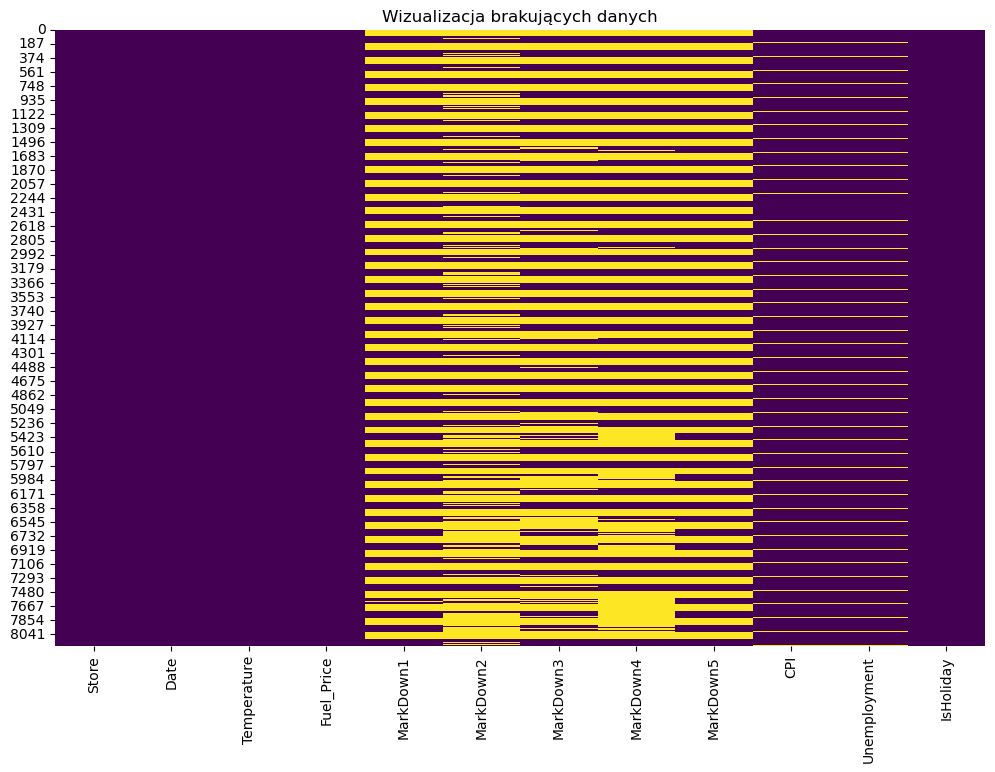

In [323]:
missing_values = features.isnull().sum()
missing_percent = (features.isnull().sum() / len(features)) * 100

# Wyświetlenie wyników
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percent': missing_percent})
print(missing_data)

# Wizualizacja brakujących danych
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(features.isnull(), cbar=False, cmap='viridis')
plt.title('Wizualizacja brakujących danych')
plt.show()

In [324]:
from fancyimpute import IterativeImputer

# Inicjalizacja MICE Imputer
mice_imputer = IterativeImputer()

# Imputacja danych
features[['CPI', 'Unemployment']] = mice_imputer.fit_transform(features[['CPI', 'Unemployment']])

# Wyświetlenie brakujących wartości po imputacji
print(features[['CPI', 'Unemployment']].isnull().sum())

CPI             0
Unemployment    0
dtype: int64


In [325]:
data=train

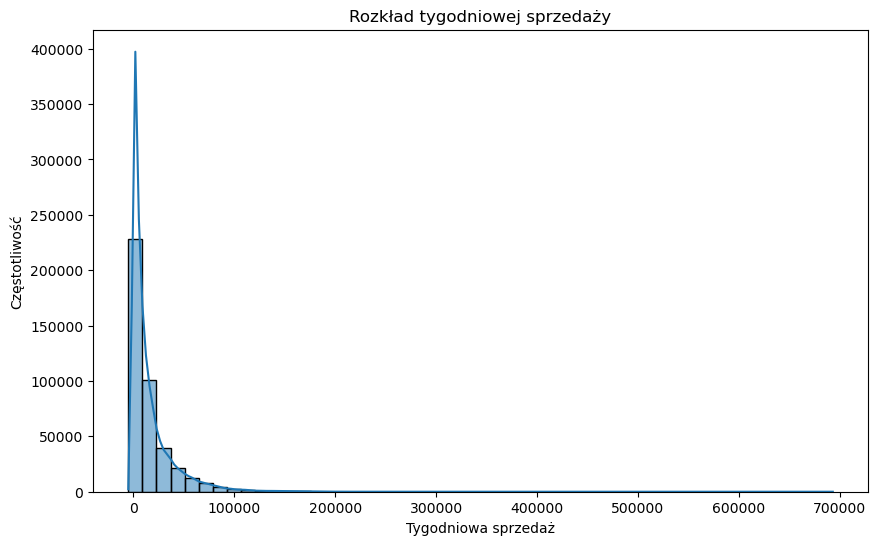

In [326]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=50, kde=True)
plt.title('Rozkład tygodniowej sprzedaży')
plt.xlabel('Tygodniowa sprzedaż')
plt.ylabel('Częstotliwość')
plt.show()

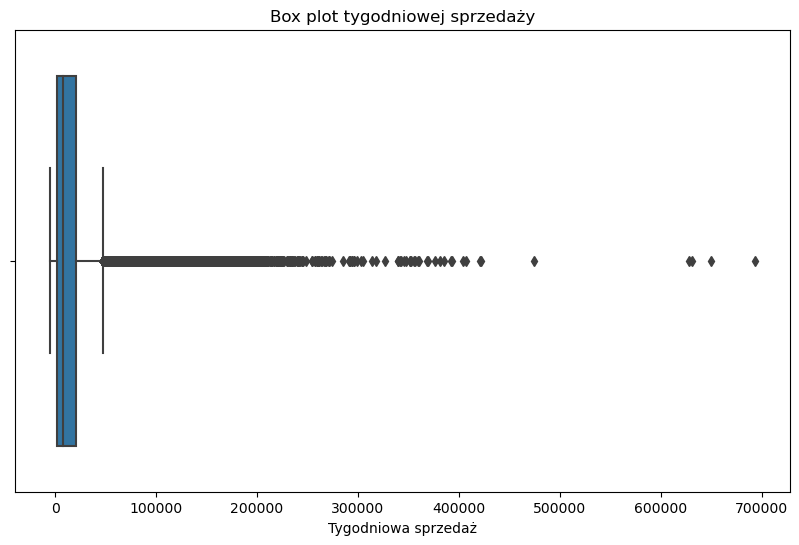

In [327]:
# Box plot dla tygodniowej sprzedaży
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Weekly_Sales'])
plt.title('Box plot tygodniowej sprzedaży')
plt.xlabel('Tygodniowa sprzedaż')
plt.show()

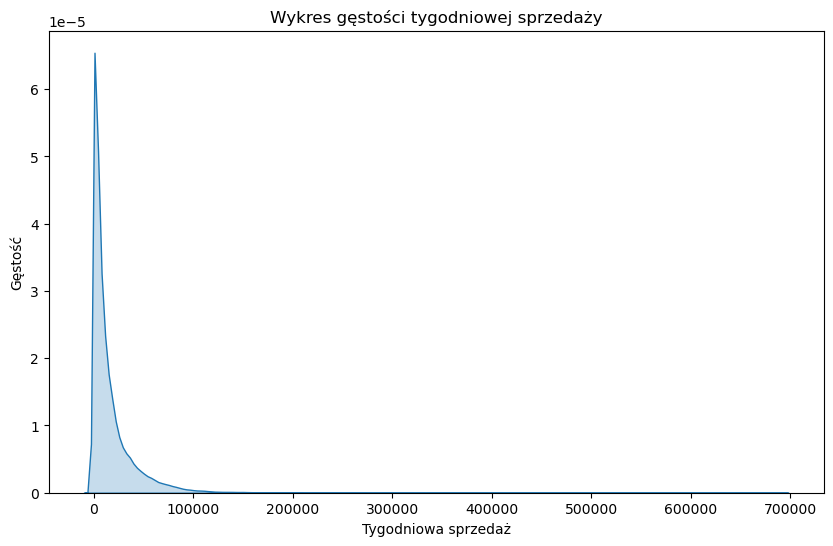

In [328]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Weekly_Sales'], shade=True)
plt.title('Wykres gęstości tygodniowej sprzedaży')
plt.xlabel('Tygodniowa sprzedaż')
plt.ylabel('Gęstość')
plt.show()

In [329]:
data['Date'] = pd.to_datetime(data['Date'])

# Dodanie kolumny 'Week' dla agregacji tygodniowej
data['Week'] = data['Date'].dt.isocalendar().week
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Wyświetlenie pierwszych kilku wierszy dla weryfikacji
print(data.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Week  Year  Month
0      1     1 2010-02-05      24924.50      False     5  2010      2
1      1     1 2010-02-12      46039.49       True     6  2010      2
2      1     1 2010-02-19      41595.55      False     7  2010      2
3      1     1 2010-02-26      19403.54      False     8  2010      2
4      1     1 2010-03-05      21827.90      False     9  2010      3


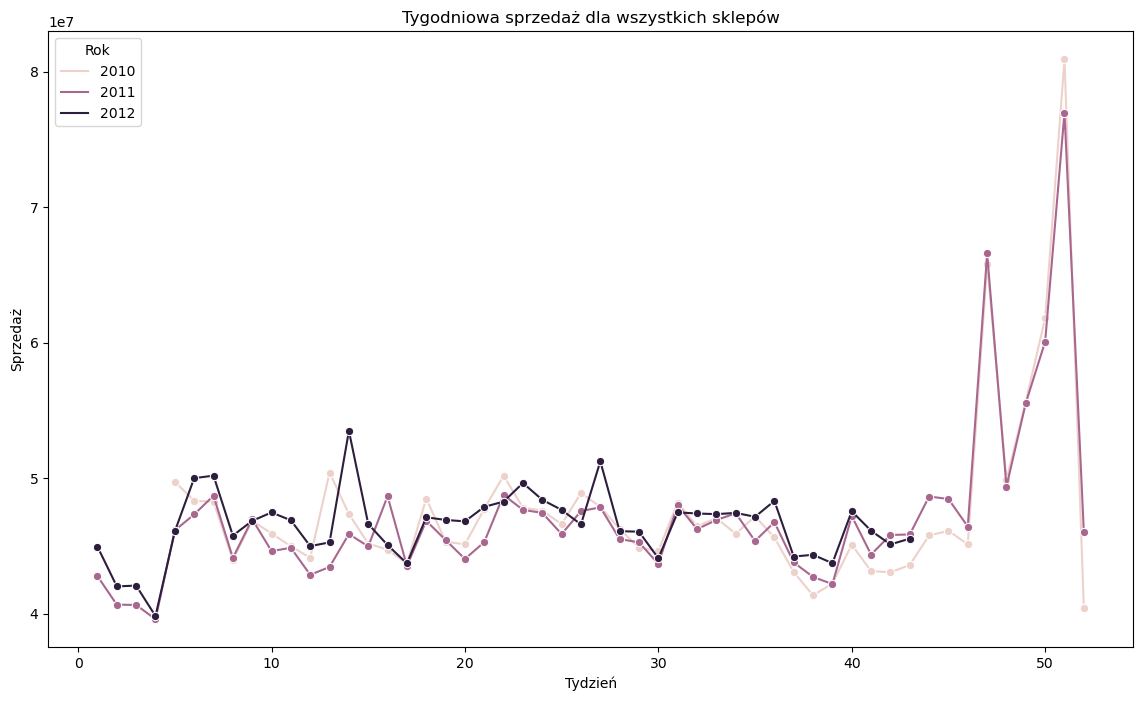

In [330]:
weekly_sales = data.groupby(['Year', 'Week'])['Weekly_Sales'].sum().reset_index()

# Wykres liniowy dla wszystkich sklepów
plt.figure(figsize=(14, 8))
sns.lineplot(data=weekly_sales, x='Week', y='Weekly_Sales', hue='Year', marker='o')
plt.title('Tygodniowa sprzedaż dla wszystkich sklepów')
plt.xlabel('Tydzień')
plt.ylabel('Sprzedaż')
plt.legend(title='Rok')
plt.show()

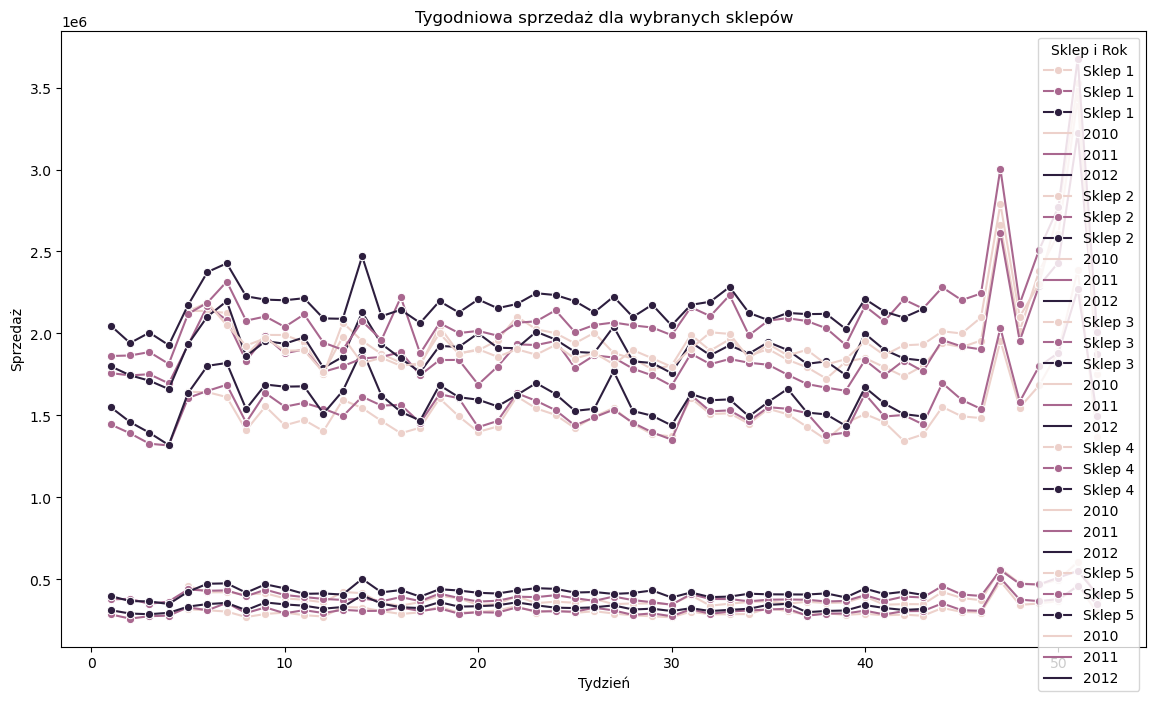

In [331]:
# Wybierz kilka sklepów do porównania
selected_stores = data['Store'].unique()[:5]  # wybiera pierwsze 5 sklepów

plt.figure(figsize=(14, 8))

# Wykres liniowy dla wybranych sklepów
for store in selected_stores:
    subset = data[data['Store'] == store].groupby(['Year', 'Week'])['Weekly_Sales'].sum().reset_index()
    sns.lineplot(data=subset, x='Week', y='Weekly_Sales', hue='Year', marker='o', label=f'Sklep {store}')

plt.title('Tygodniowa sprzedaż dla wybranych sklepów')
plt.xlabel('Tydzień')
plt.ylabel('Sprzedaż')
plt.legend(title='Sklep i Rok')
plt.show()

In [332]:
# grupowanie dept w sklepach
grouped_data_train = train.groupby(['Store', 'Date']).agg({'Weekly_Sales': 'sum'}).reset_index()

In [333]:
grouped_data_train['Date'] = pd.to_datetime(grouped_data_train['Date'])
features['Date'] = pd.to_datetime(features['Date'])
merged_data = pd.merge(grouped_data_train, features, on=['Store', 'Date'], how='left')

In [334]:
print(f'Liczba wierszy w grouped_data: {len(grouped_data_train)}')
print(f'Liczba wierszy w merged_data: {len(merged_data)}')

Liczba wierszy w grouped_data: 6435
Liczba wierszy w merged_data: 6435


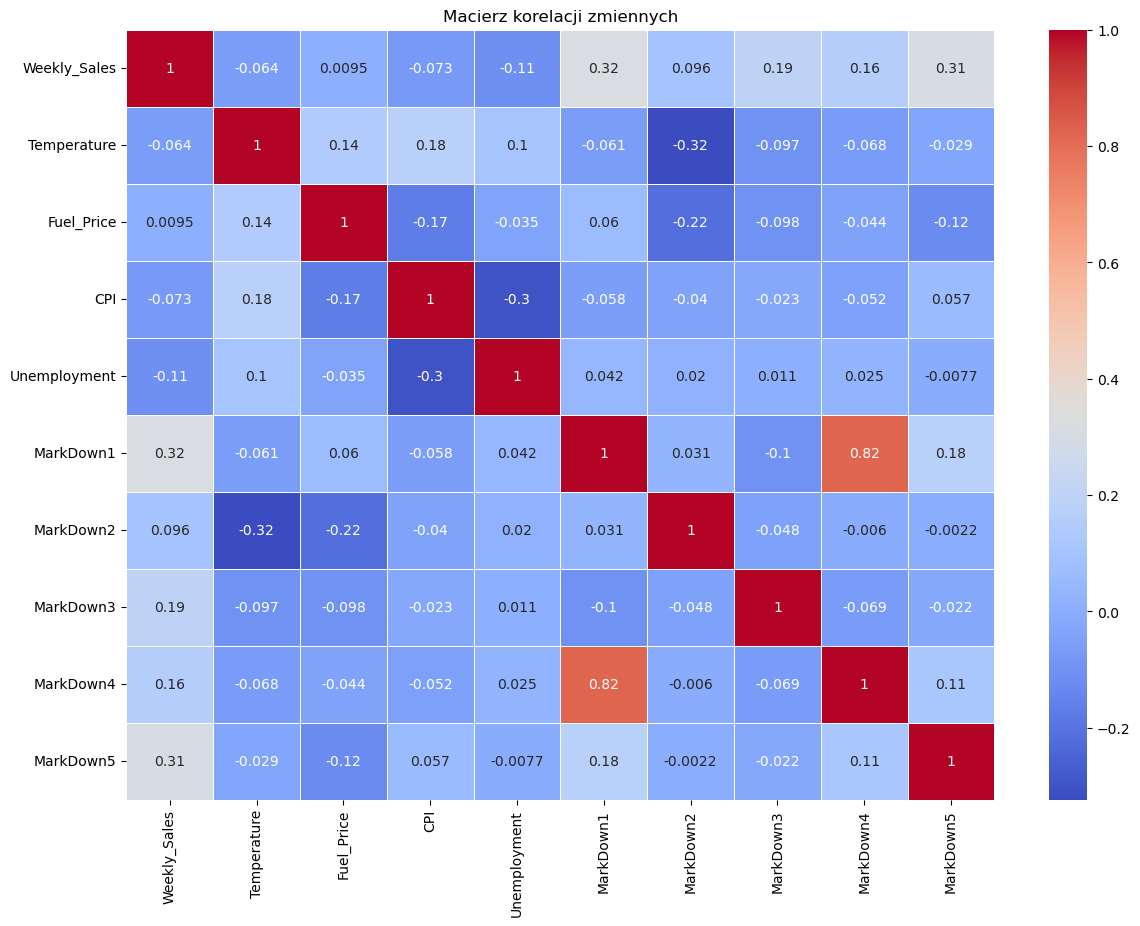

In [335]:
data=merged_data
# Wybranie istotnych kolumn do analizy korelacji
corr_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']

# Obliczenie macierzy korelacji
correlation_matrix = data[corr_columns].corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji zmiennych')
plt.show()


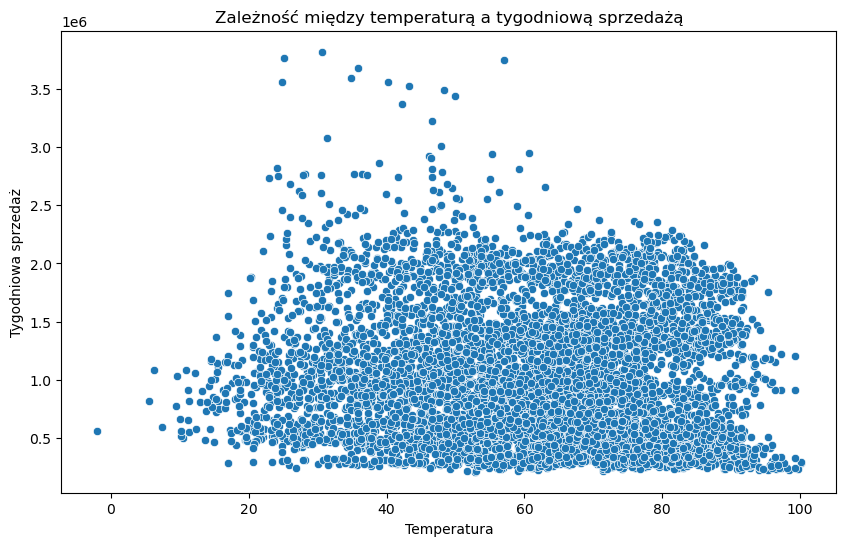

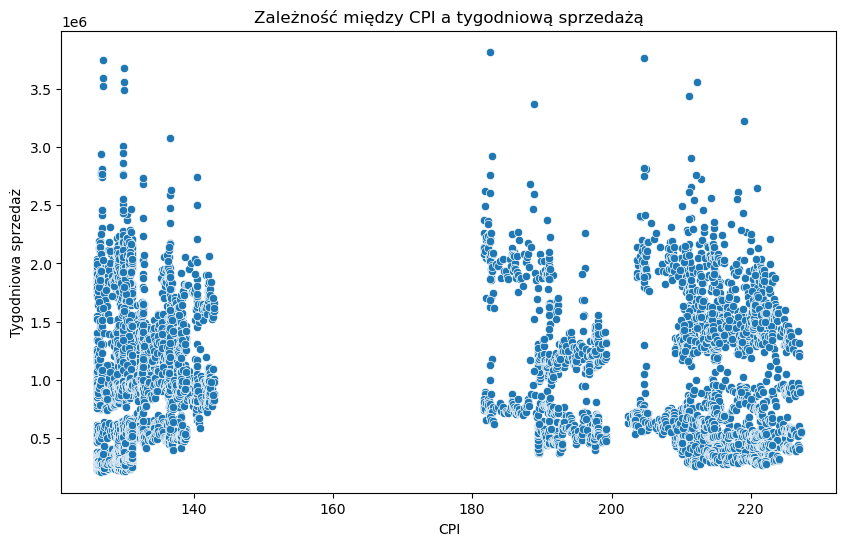

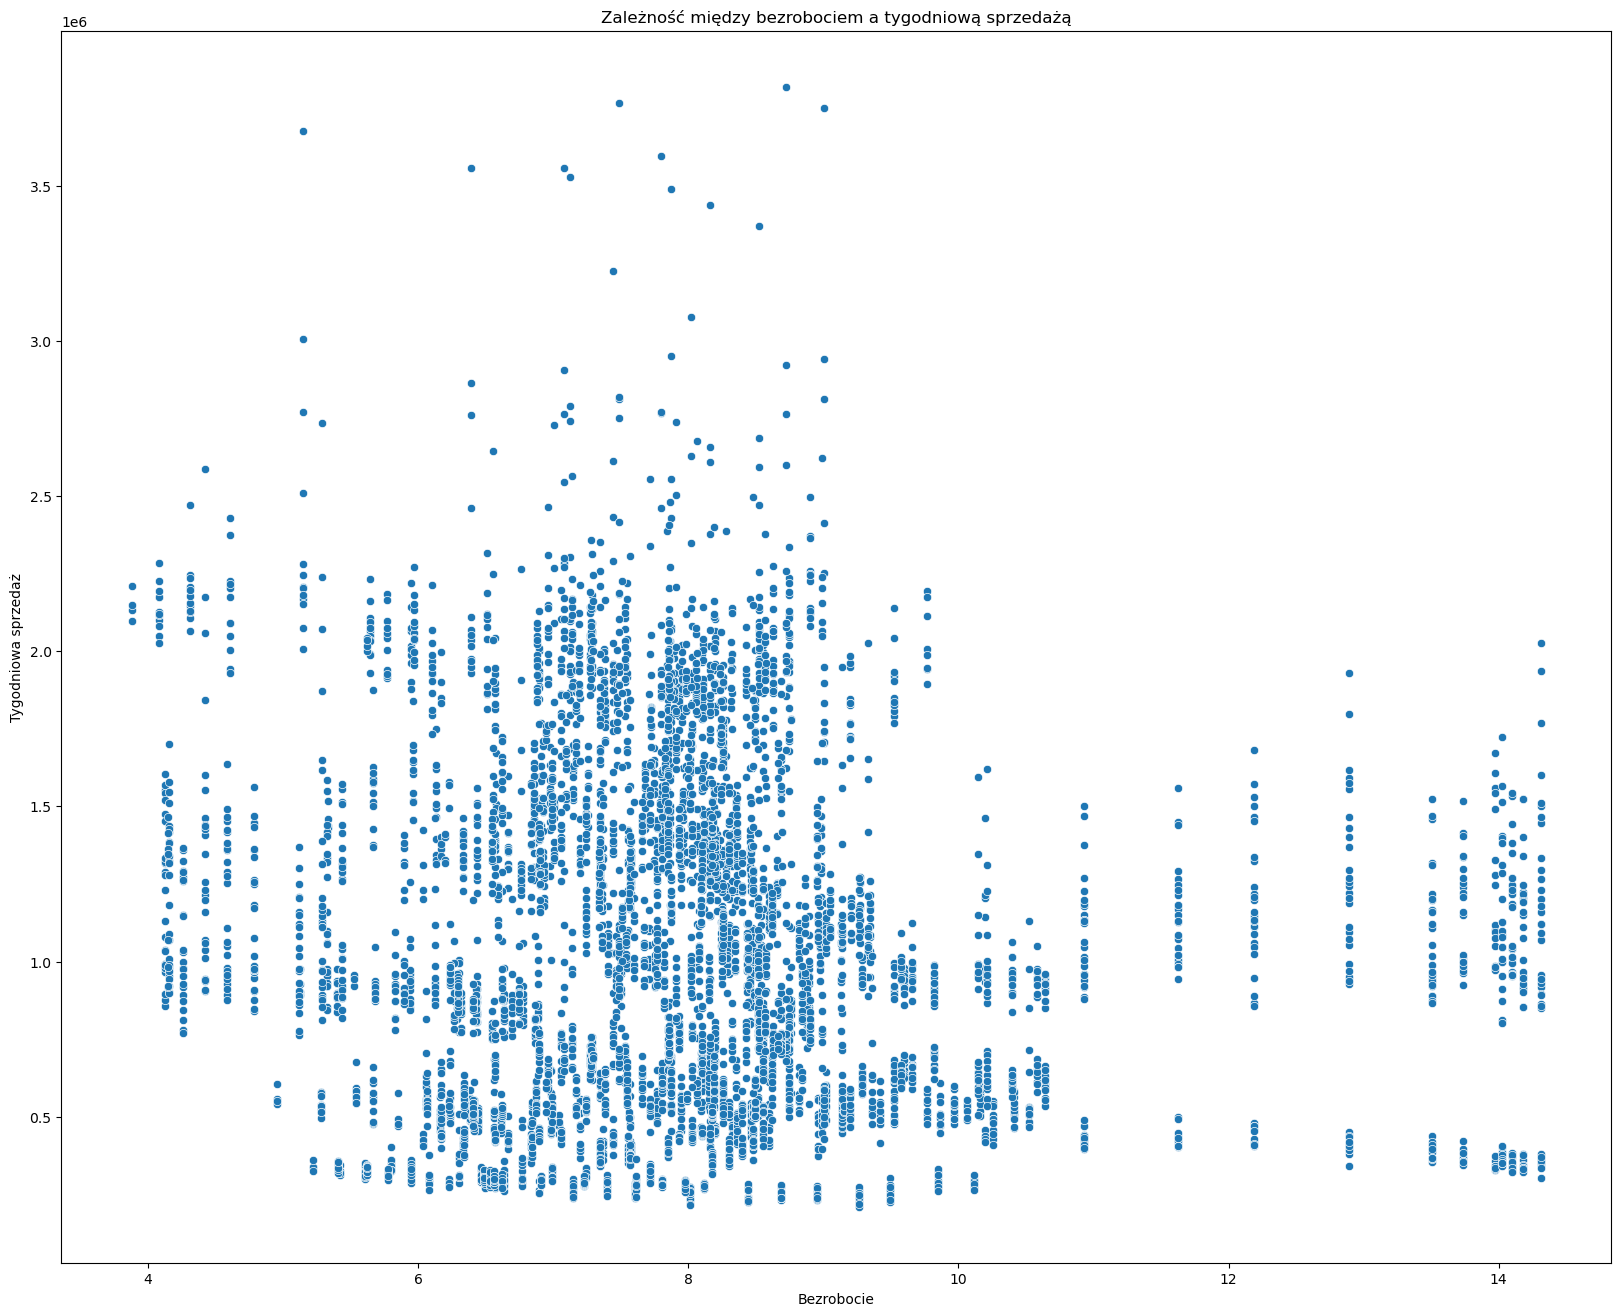

In [336]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Temperature', y='Weekly_Sales')
plt.title('Zależność między temperaturą a tygodniową sprzedażą')
plt.xlabel('Temperatura')
plt.ylabel('Tygodniowa sprzedaż')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='CPI', y='Weekly_Sales')
plt.title('Zależność między CPI a tygodniową sprzedażą')
plt.xlabel('CPI')
plt.ylabel('Tygodniowa sprzedaż')
plt.show()

plt.figure(figsize=(20, 16))
sns.scatterplot(data=merged_data, x='Unemployment', y='Weekly_Sales')
plt.title('Zależność między bezrobociem a tygodniową sprzedażą')
plt.xlabel('Bezrobocie')
plt.ylabel('Tygodniowa sprzedaż')
plt.show()



In [524]:
store_data = merged_data.groupby('Store').agg({
    'Weekly_Sales': 'skew',
    'Temperature': 'median',
    'Fuel_Price': 'median',
    'CPI': 'median',
    'Unemployment': 'median',
    'MarkDown1': 'skew',
    'MarkDown2': 'skew',
    'MarkDown3': 'skew',
    'MarkDown4': 'skew',
    'MarkDown5': 'skew',
    
}).reset_index()

# Standaryzacja danych
scaler = StandardScaler()
store_data_scaled = scaler.fit_transform(store_data.drop('Store', axis=1))

# Konwersja do DataFrame z zachowaniem nazw kolumn
store_data_scaled = pd.DataFrame(store_data_scaled, columns=store_data.columns[1:])

In [525]:
# Grupowanie K-means
kmeans = KMeans(n_clusters=3, random_state=42,)
store_data['Cluster'] = kmeans.fit_predict(store_data_scaled)

# Wyświetlenie przypisania sklepów do klastrów
print(store_data[['Store', 'Cluster']])

    Store  Cluster
0       1        0
1       2        0
2       3        0
3       4        1
4       5        0
5       6        0
6       7        1
7       8        0
8       9        0
9      10        1
10     11        0
11     12        1
12     13        1
13     14        1
14     15        1
15     16        1
16     17        1
17     18        1
18     19        1
19     20        1
20     21        0
21     22        1
22     23        1
23     24        1
24     25        1
25     26        1
26     27        1
27     28        1
28     29        1
29     30        2
30     31        0
31     32        1
32     33        2
33     34        1
34     35        1
35     36        2
36     37        2
37     38        2
38     39        0
39     40        1
40     41        1
41     42        2
42     43        2
43     44        2
44     45        1


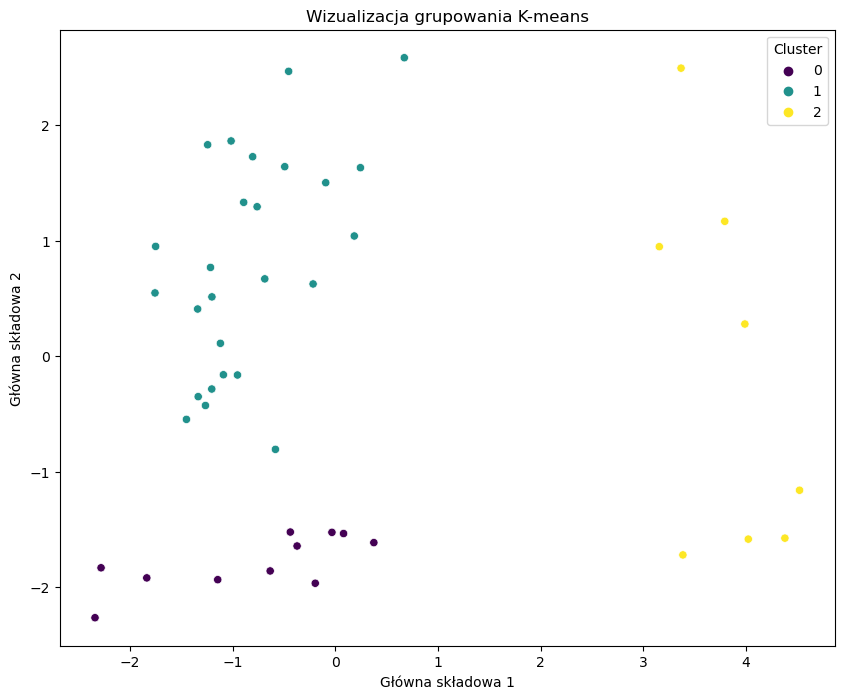

In [526]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(store_data_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=store_data['Cluster'], palette='viridis')
plt.title('Wizualizacja grupowania K-means')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.legend(title='Cluster')
plt.show()


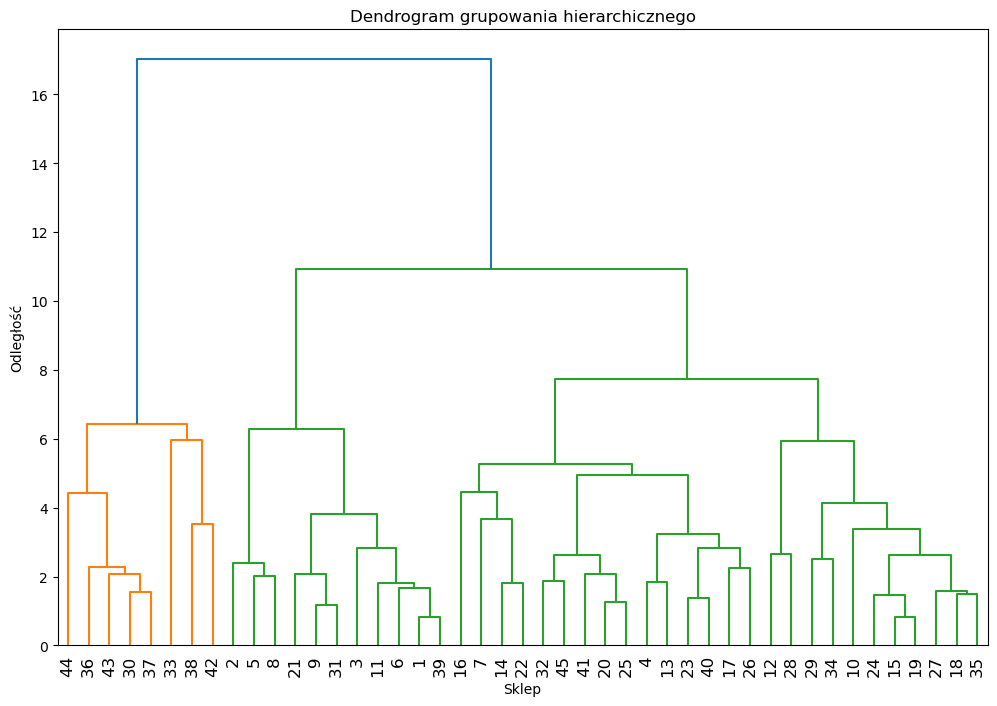

In [527]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Grupowanie hierarchiczne
linked = linkage(store_data_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linked, labels=store_data['Store'].values, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram grupowania hierarchicznego')
plt.xlabel('Sklep')
plt.ylabel('Odległość')
plt.show()


In [528]:
# Agregacja danych dla każdego klastra
cluster_analysis = store_data.groupby('Cluster').agg({
    'Weekly_Sales': ['mean', 'median', 'std'],
    'Temperature': ['mean', 'median', 'std'],
    'Fuel_Price': ['mean', 'median', 'std'],
    'CPI': ['mean', 'median', 'std'],
    'Unemployment': ['mean', 'median', 'std']
}).reset_index()

# Spłaszczenie wielopoziomowego indeksu kolumn
cluster_analysis.columns = ['_'.join(col).strip() for col in cluster_analysis.columns.values]

print(cluster_analysis)


   Cluster_  Weekly_Sales_mean  Weekly_Sales_median  Weekly_Sales_std  \
0         0           2.721437             2.687897          0.600956   
1         1           2.734792             2.766501          0.834830   
2         2           0.229965             0.226506          0.264028   

   Temperature_mean  Temperature_median  Temperature_std  Fuel_Price_mean  \
0         70.276364              70.190         2.700916         3.290000   
1         55.671923              55.790         7.474421         3.537231   
2         69.980000              71.955         7.575506         3.447500   

   Fuel_Price_median  Fuel_Price_std    CPI_mean  CPI_median    CPI_std  \
0              3.290        0.000000  216.698167  216.028041   1.887043   
1              3.559        0.141744  152.377320  135.083733  29.573117   
2              3.335        0.199481  170.881860  168.166935  44.756369   

   Unemployment_mean  Unemployment_median  Unemployment_std  
0           7.326636               

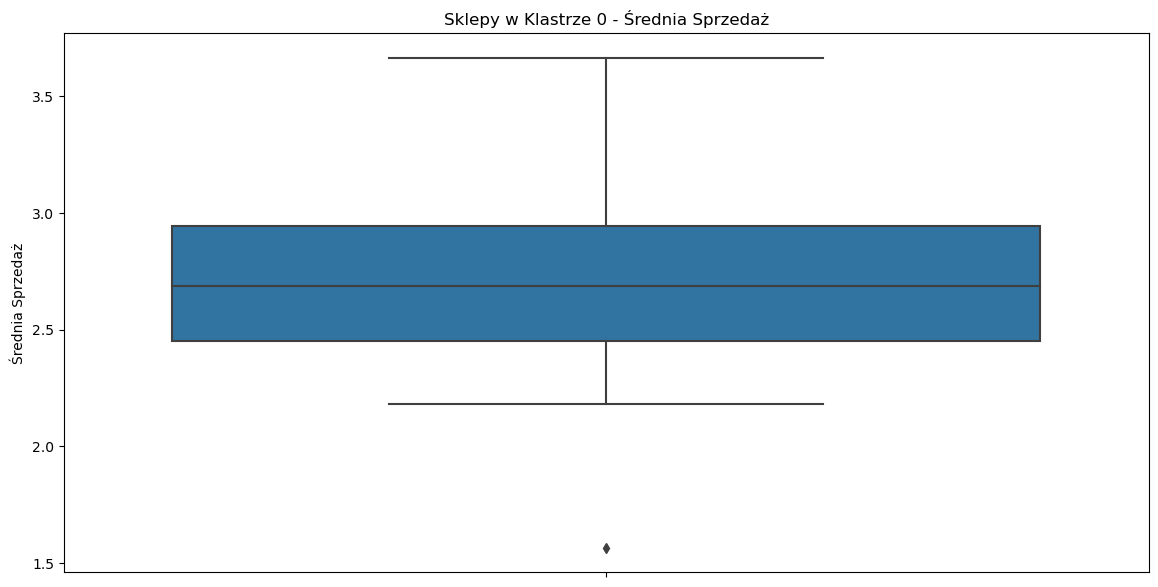

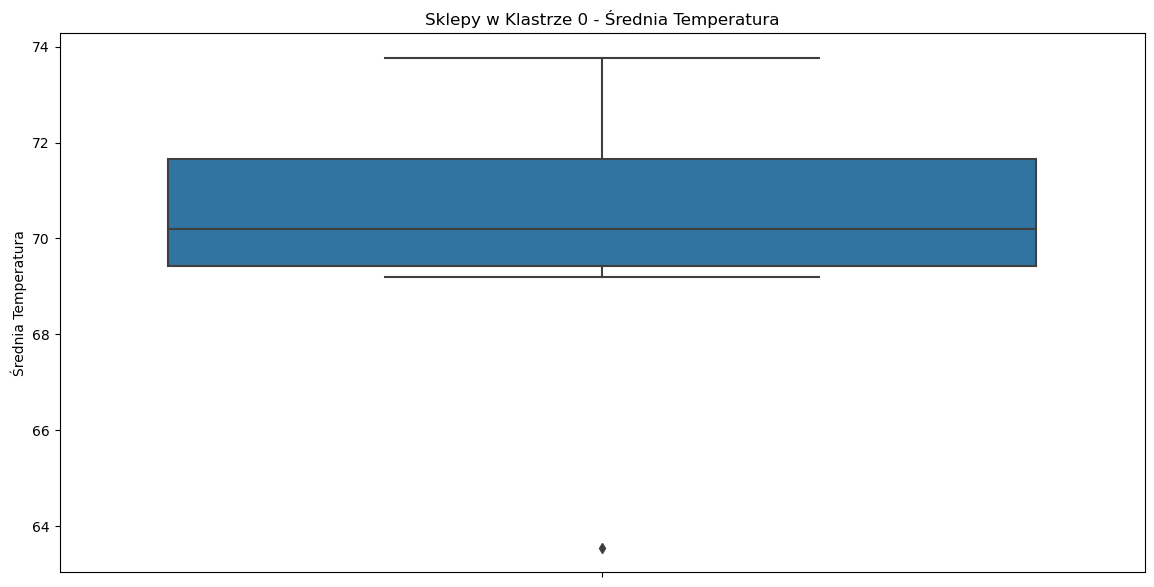

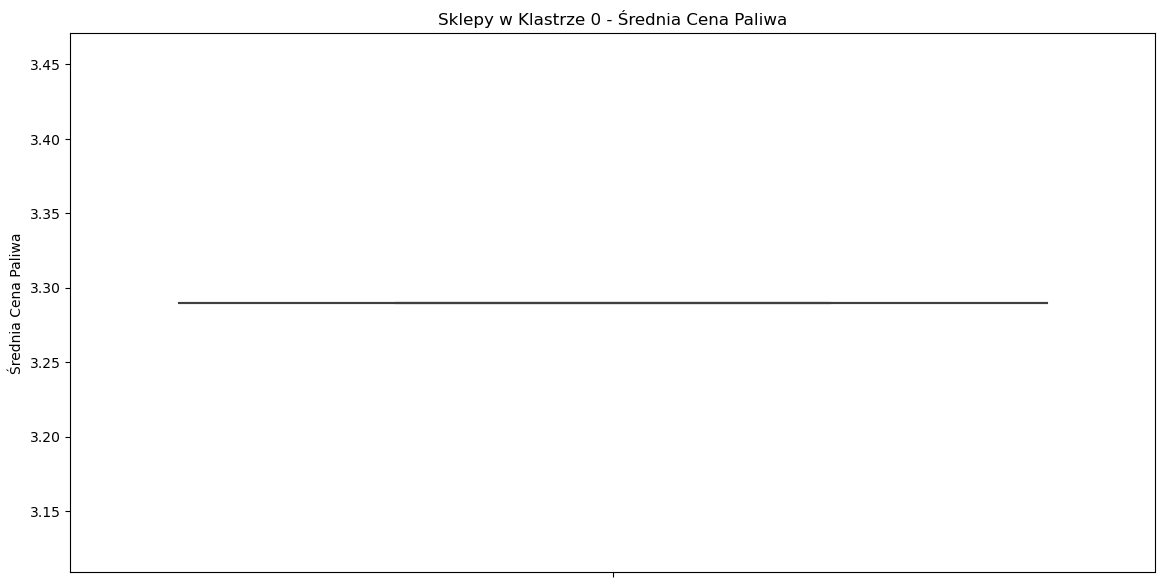

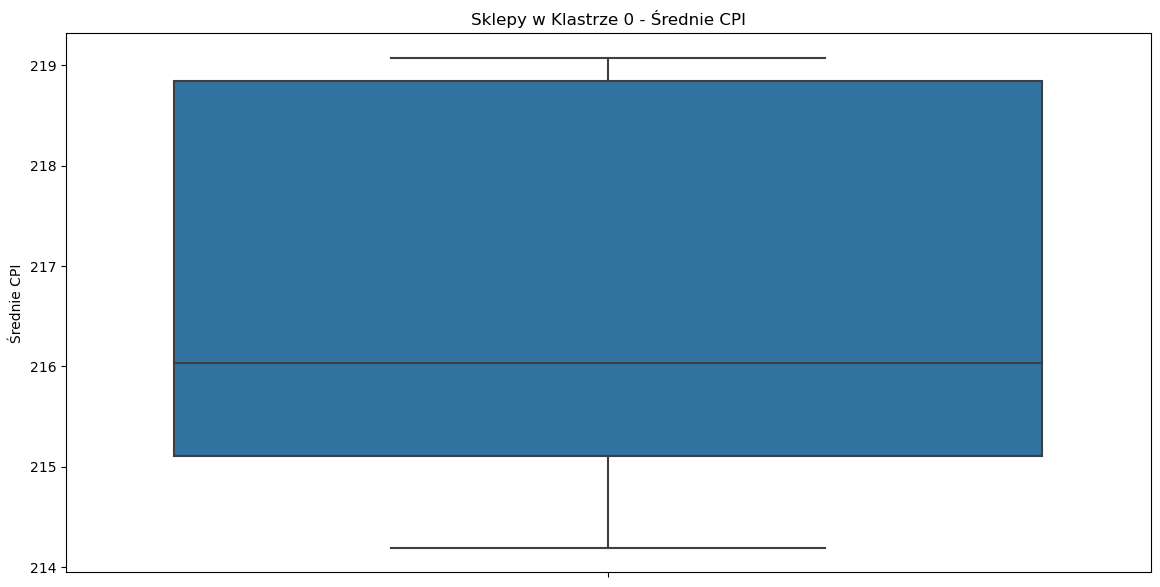

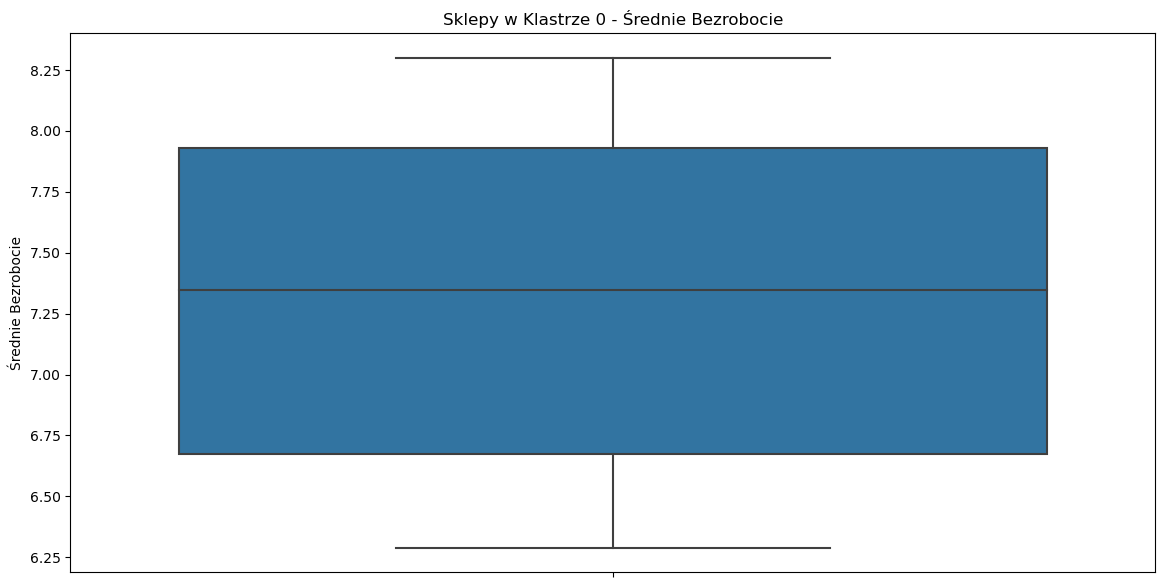

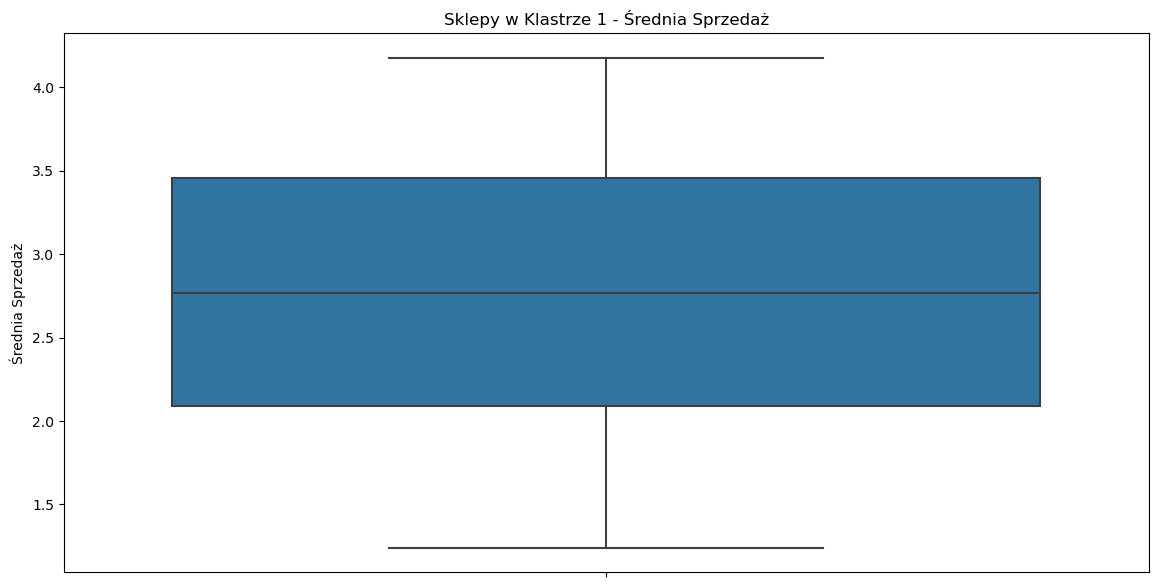

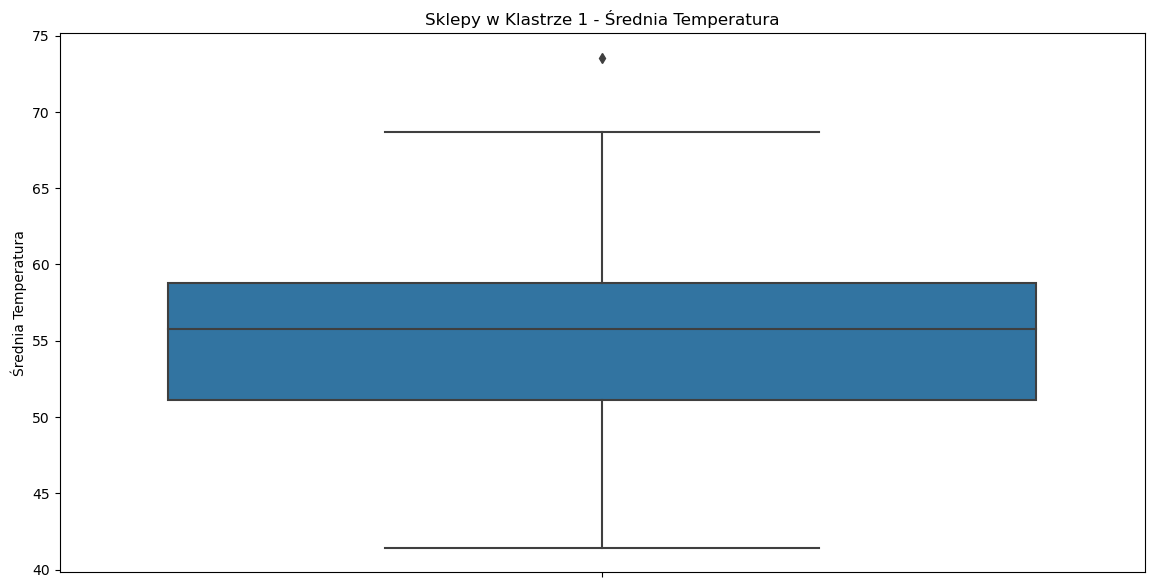

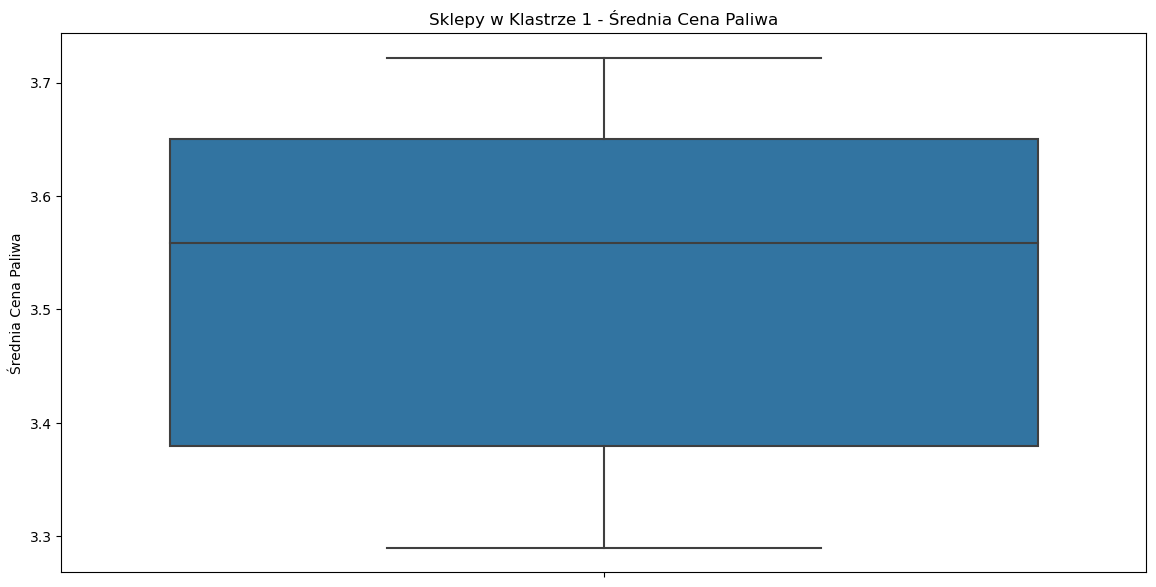

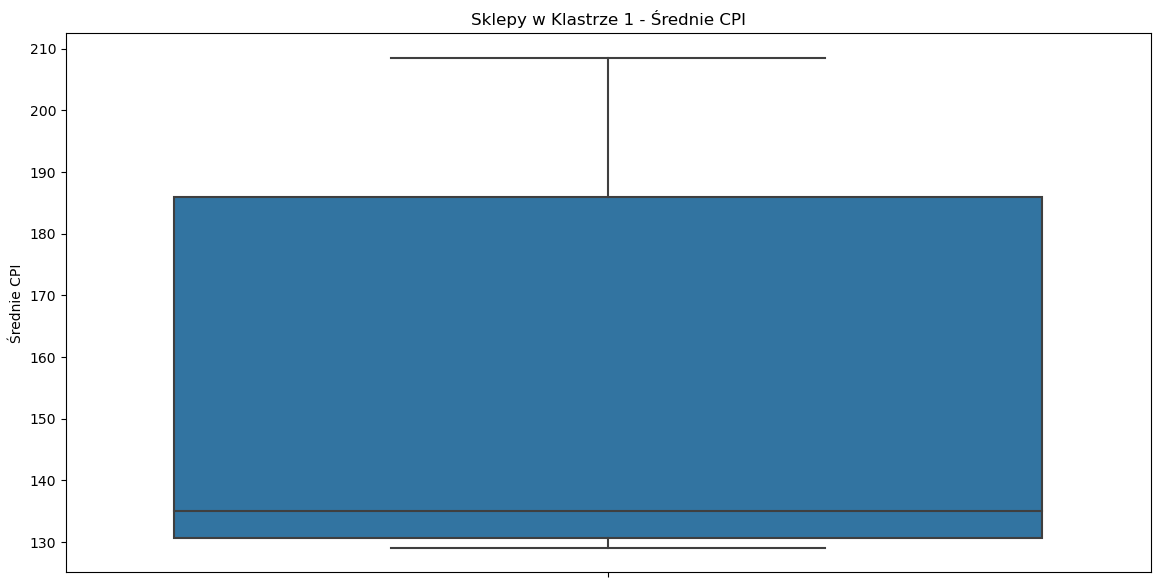

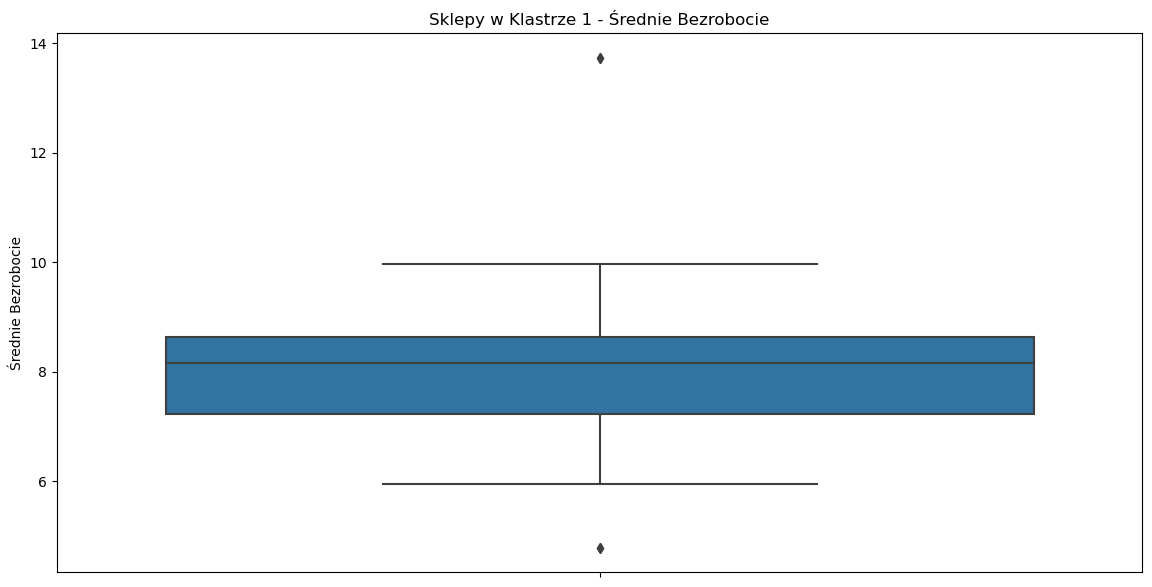

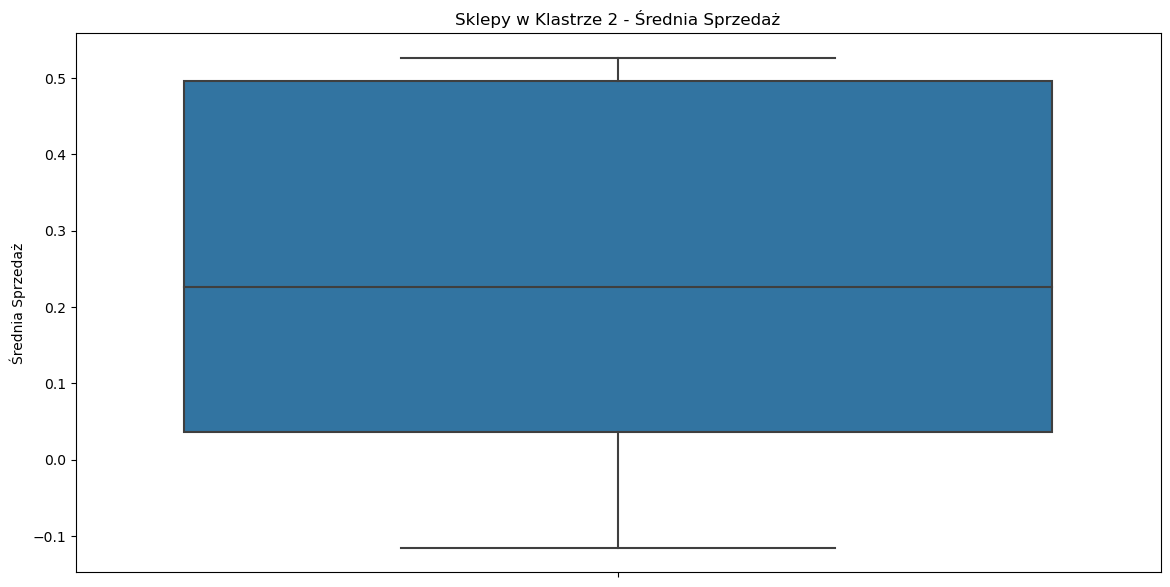

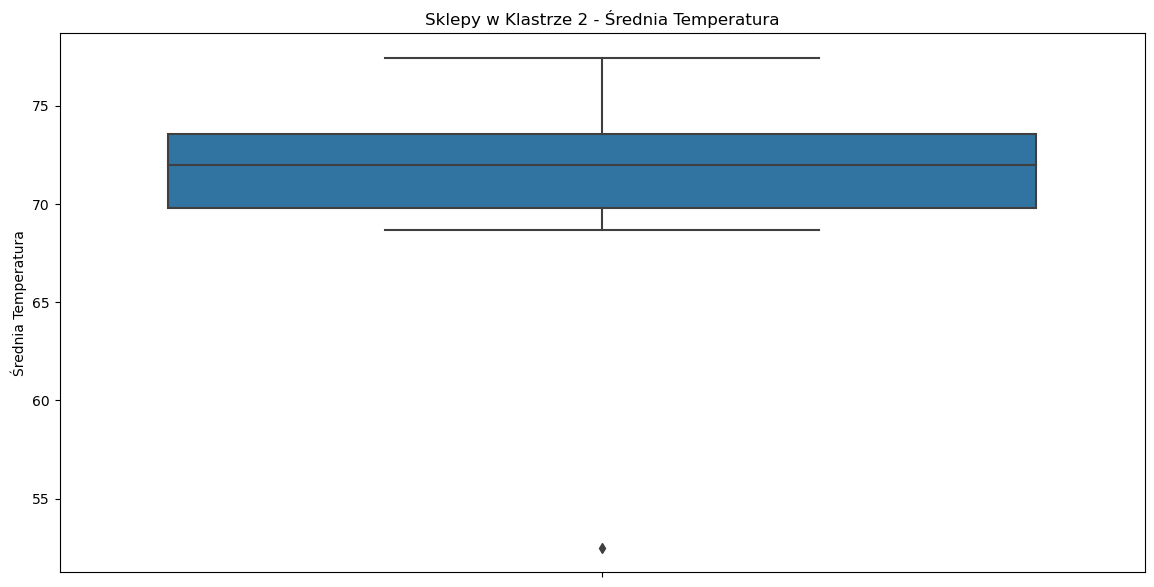

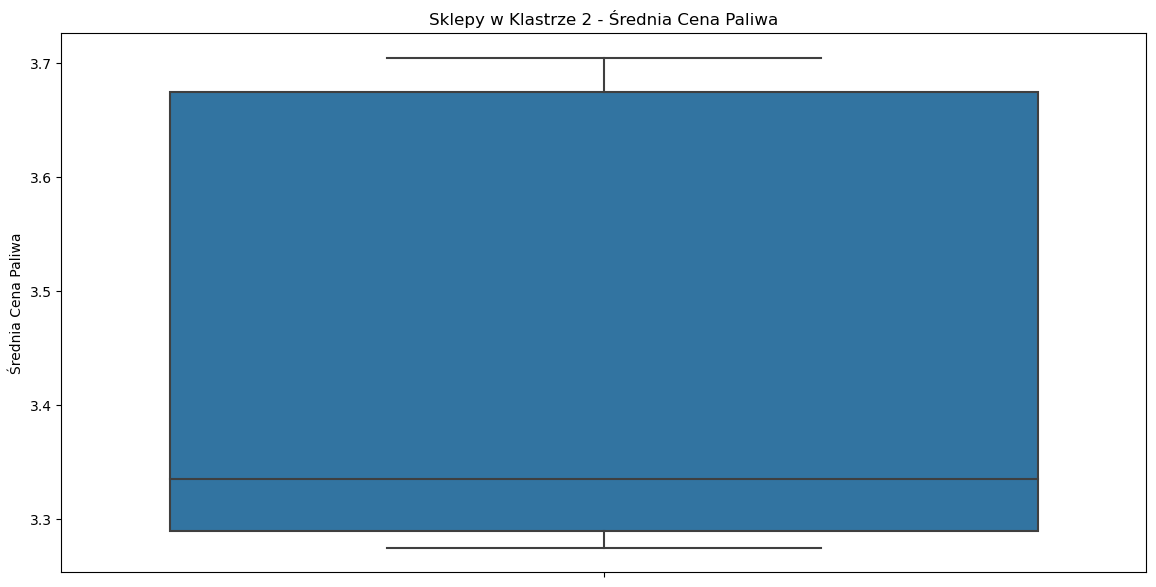

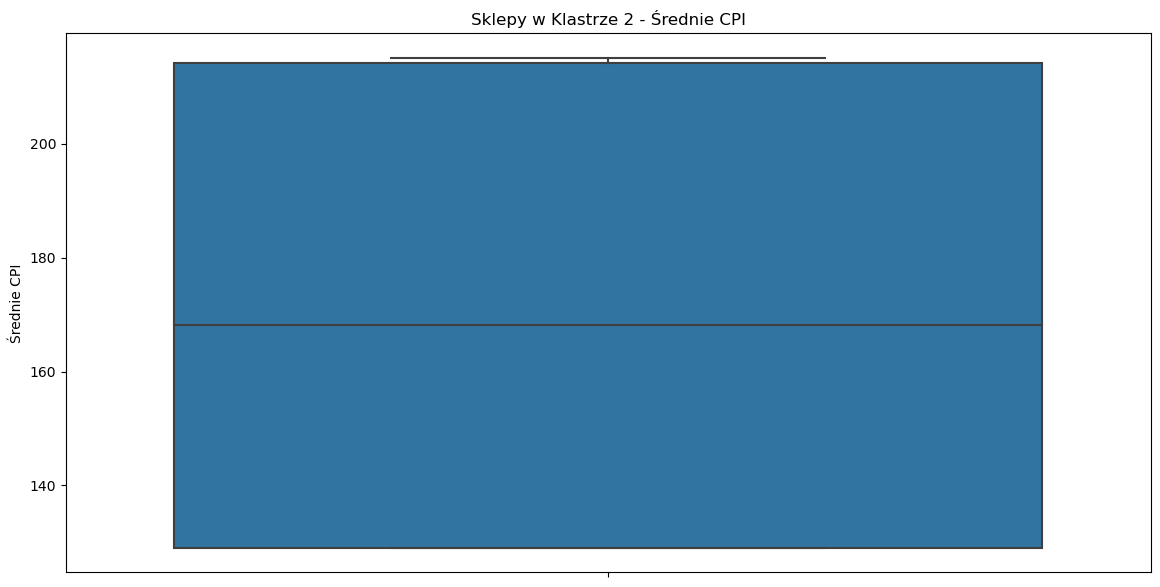

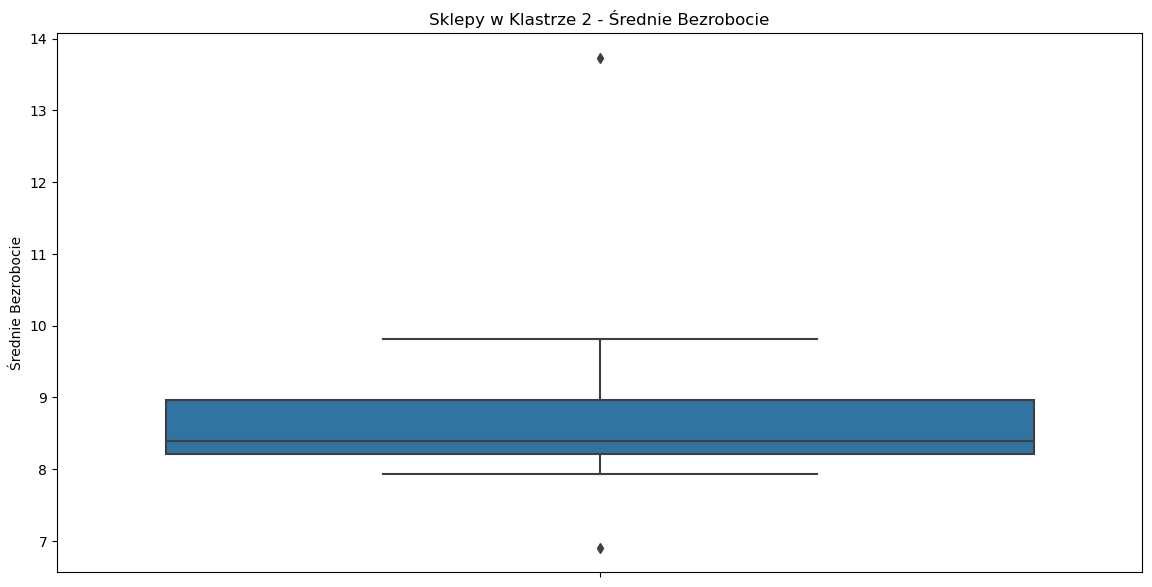

In [529]:
for cluster in store_data['Cluster'].unique():
    cluster_data = store_data[store_data['Cluster'] == cluster]
    
    # Wykres pudełkowy dla średniej sprzedaży
    plt.figure(figsize=(14, 7))
    sns.boxplot(y='Weekly_Sales', data=cluster_data)
    plt.title(f'Sklepy w Klastrze {cluster} - Średnia Sprzedaż')
    plt.ylabel('Średnia Sprzedaż')
    plt.show()
    
    # Wykres dla średniej temperatury
    plt.figure(figsize=(14, 7))
    sns.boxplot(y='Temperature', data=cluster_data)
    plt.title(f'Sklepy w Klastrze {cluster} - Średnia Temperatura')
    plt.ylabel('Średnia Temperatura')
    plt.show()
    
    # Wykres dla ceny paliwa
    plt.figure(figsize=(14, 7))
    sns.boxplot(y='Fuel_Price', data=cluster_data)
    plt.title(f'Sklepy w Klastrze {cluster} - Średnia Cena Paliwa')
    plt.ylabel('Średnia Cena Paliwa')
    plt.show()

    # Wykres dla CPI
    plt.figure(figsize=(14, 7))
    sns.boxplot(y='CPI', data=cluster_data)
    plt.title(f'Sklepy w Klastrze {cluster} - Średnie CPI')
    plt.ylabel('Średnie CPI')
    plt.show()

    # Wykres dla bezrobocia
    plt.figure(figsize=(14, 7))
    sns.boxplot(y='Unemployment', data=cluster_data)
    plt.title(f'Sklepy w Klastrze {cluster} - Średnie Bezrobocie')
    plt.ylabel('Średnie Bezrobocie')
    plt.show()

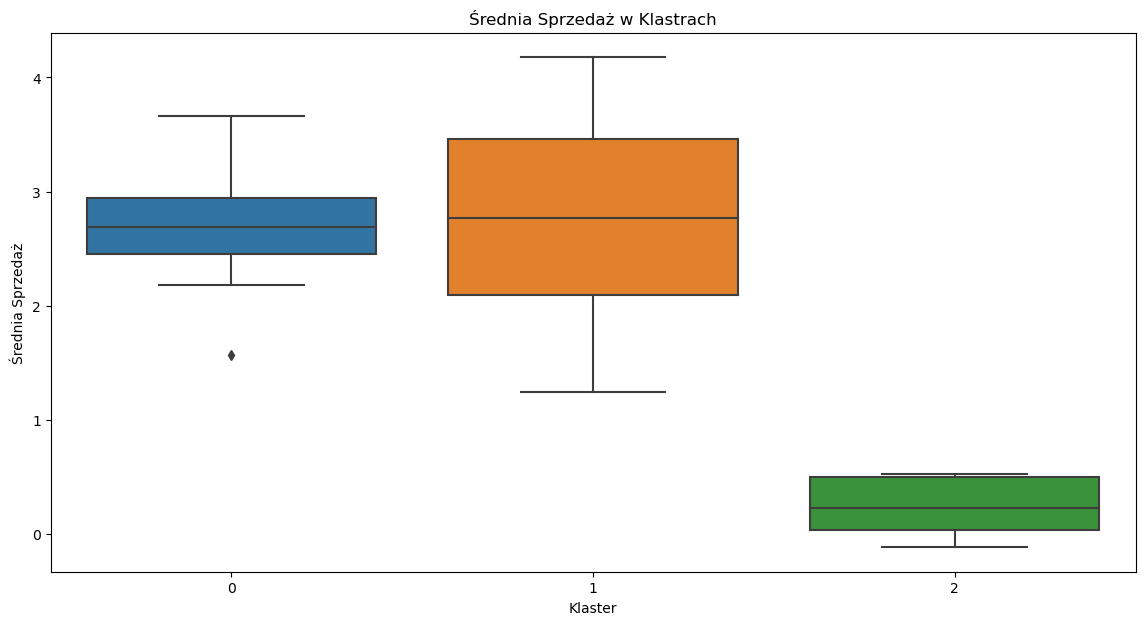

In [530]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Cluster', y='Weekly_Sales', data=store_data)
plt.title('Średnia Sprzedaż w Klastrach')
plt.xlabel('Klaster')
plt.ylabel('Średnia Sprzedaż')
plt.show()


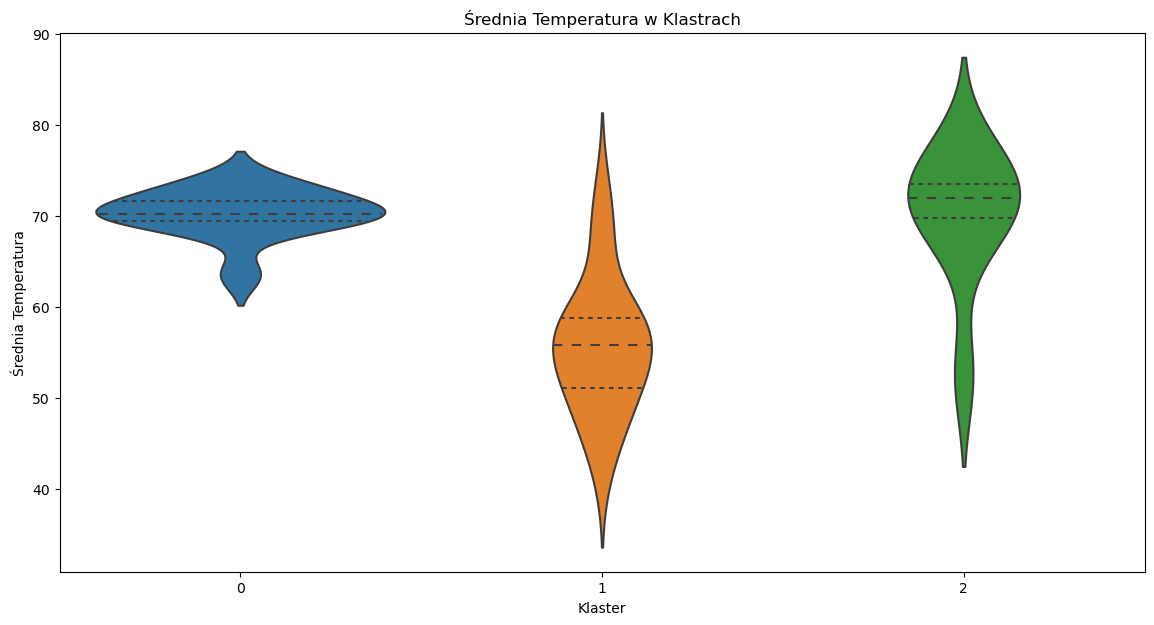

In [531]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Cluster', y='Temperature', data=store_data, inner='quartile')
plt.title('Średnia Temperatura w Klastrach')
plt.xlabel('Klaster')
plt.ylabel('Średnia Temperatura')
plt.show()


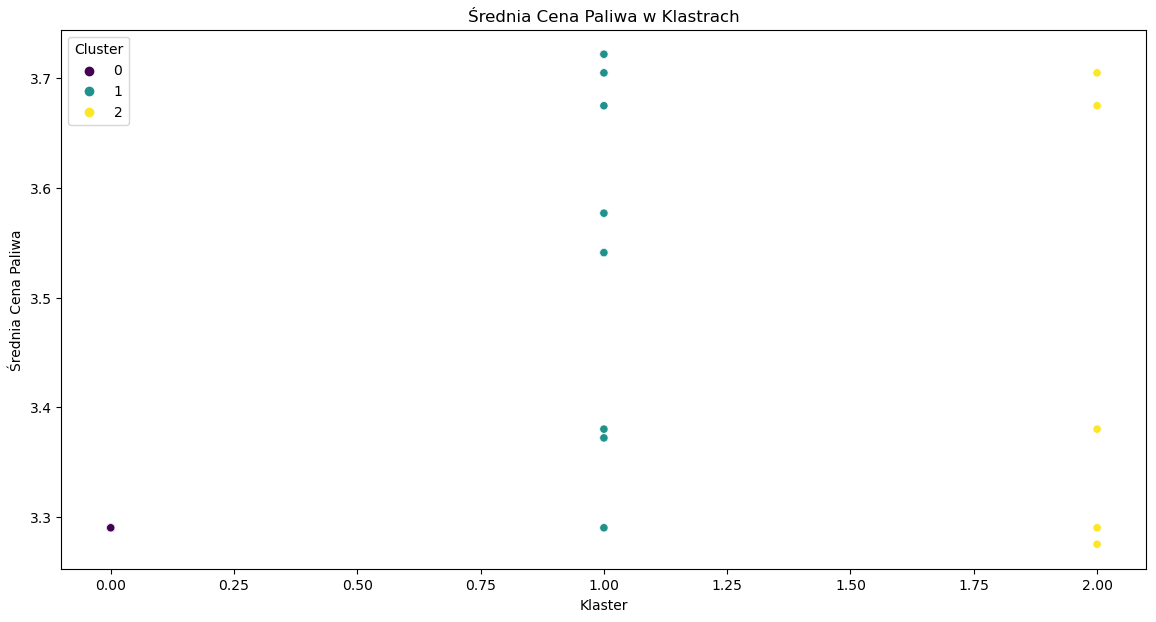

In [532]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Cluster', y='Fuel_Price', data=store_data, hue='Cluster', palette='viridis')
plt.title('Średnia Cena Paliwa w Klastrach')
plt.xlabel('Klaster')
plt.ylabel('Średnia Cena Paliwa')
plt.show()


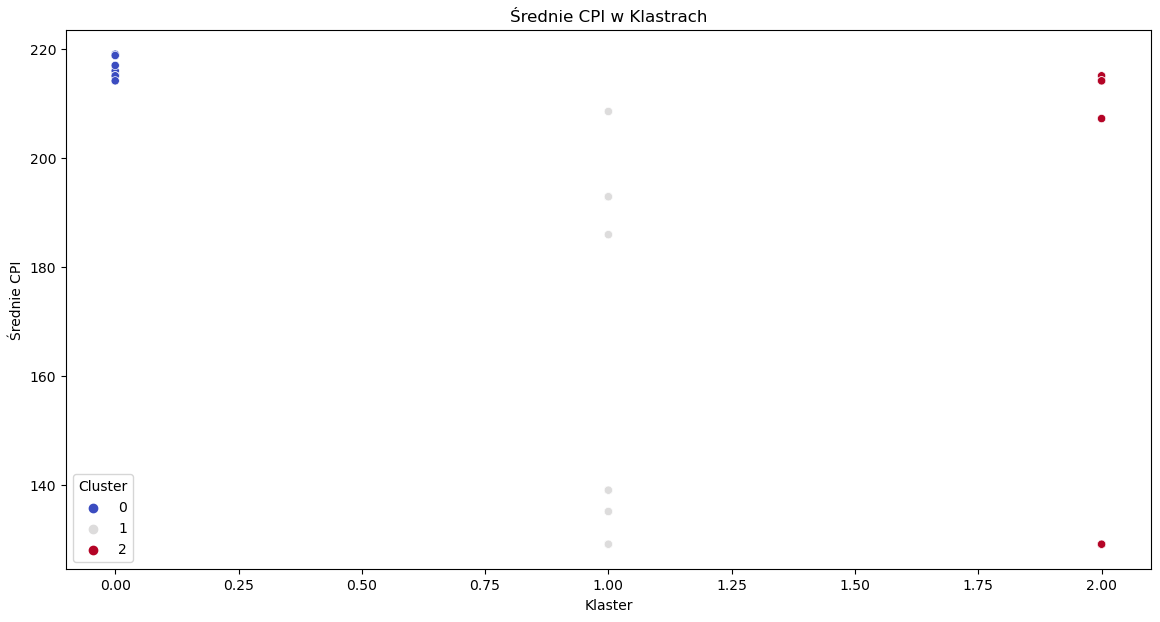

In [533]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Cluster', y='CPI', data=store_data, hue='Cluster', palette='coolwarm')
plt.title('Średnie CPI w Klastrach')
plt.xlabel('Klaster')
plt.ylabel('Średnie CPI')
plt.show()


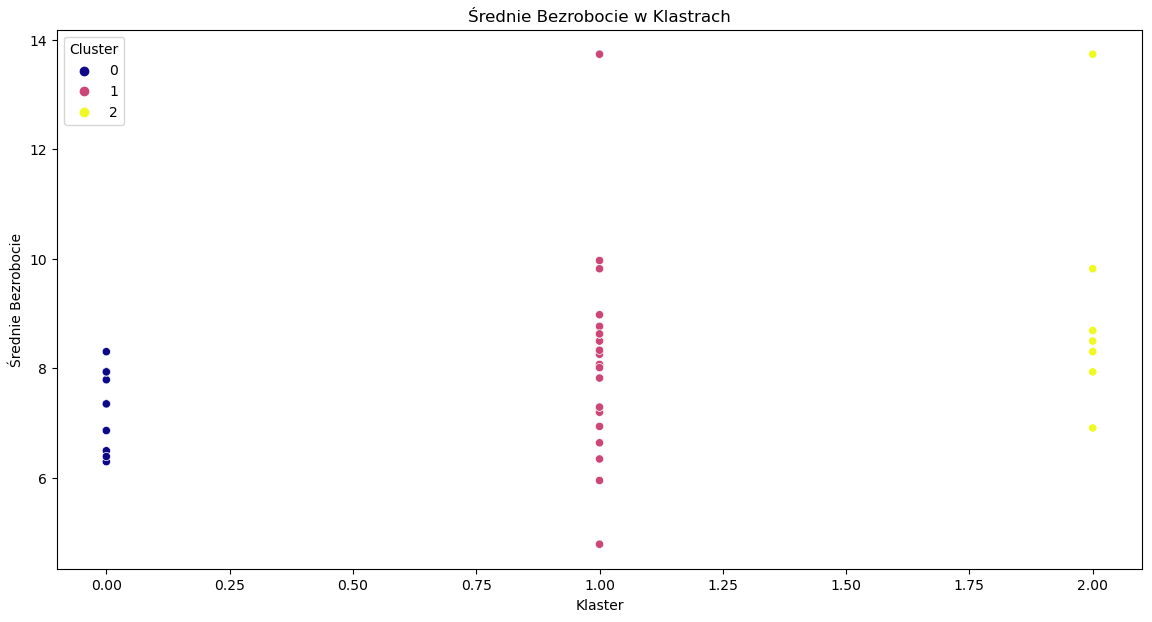

In [534]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Cluster', y='Unemployment', data=store_data, hue='Cluster', palette='plasma')
plt.title('Średnie Bezrobocie w Klastrach')
plt.xlabel('Klaster')
plt.ylabel('Średnie Bezrobocie')
plt.show()


   Cluster_  Weekly_Sales_mean  Weekly_Sales_median  Weekly_Sales_std  \
0         0           2.721437             2.687897          0.600956   
1         1           2.734792             2.766501          0.834830   
2         2           0.229965             0.226506          0.264028   

   Temperature_mean  Temperature_median  Temperature_std  Fuel_Price_mean  \
0         70.276364              70.190         2.700916         3.290000   
1         55.671923              55.790         7.474421         3.537231   
2         69.980000              71.955         7.575506         3.447500   

   Fuel_Price_median  Fuel_Price_std  ...  CPI_median    CPI_std  \
0              3.290        0.000000  ...  216.028041   1.887043   
1              3.559        0.141744  ...  135.083733  29.573117   
2              3.335        0.199481  ...  168.166935  44.756369   

   Unemployment_mean  Unemployment_median  Unemployment_std  MarkDown1_skew  \
0           7.326636               7.3460     

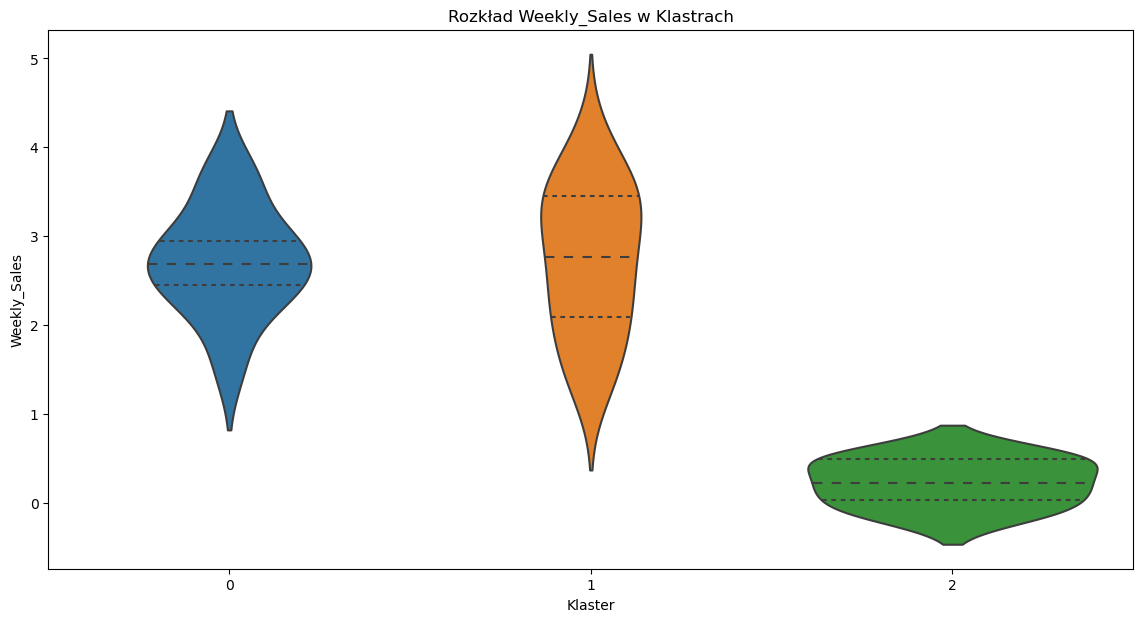

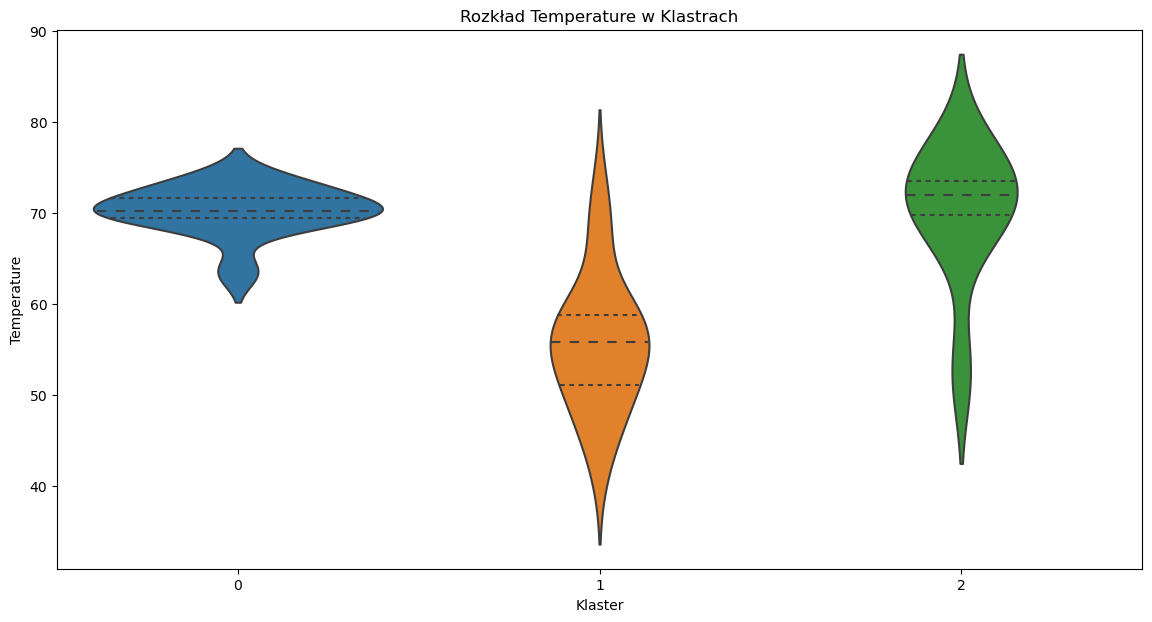

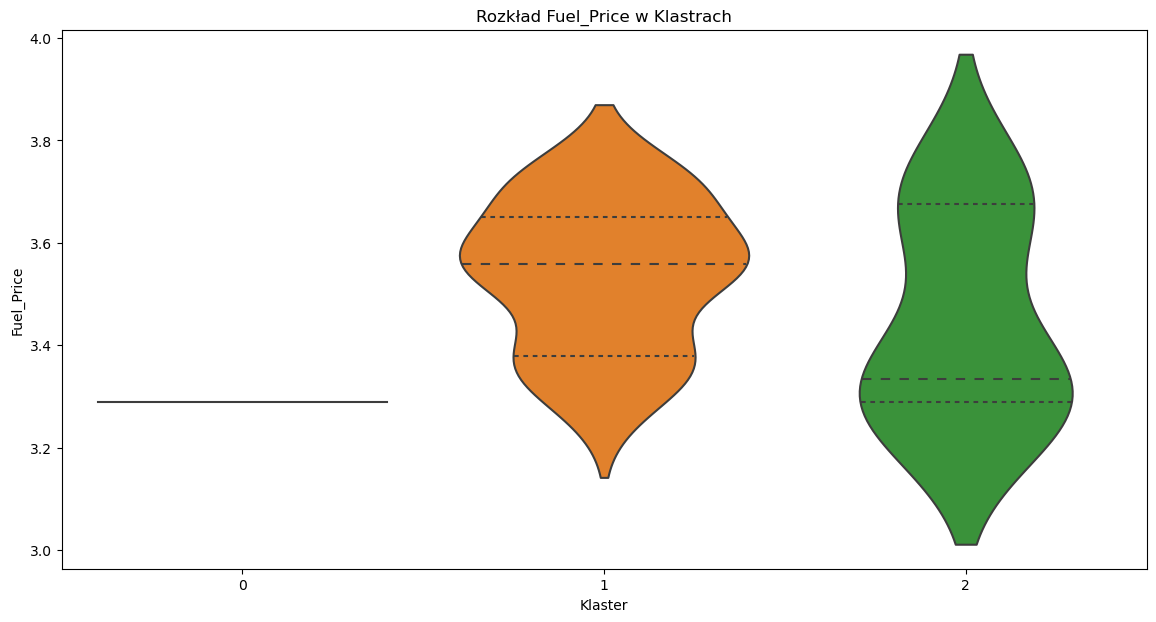

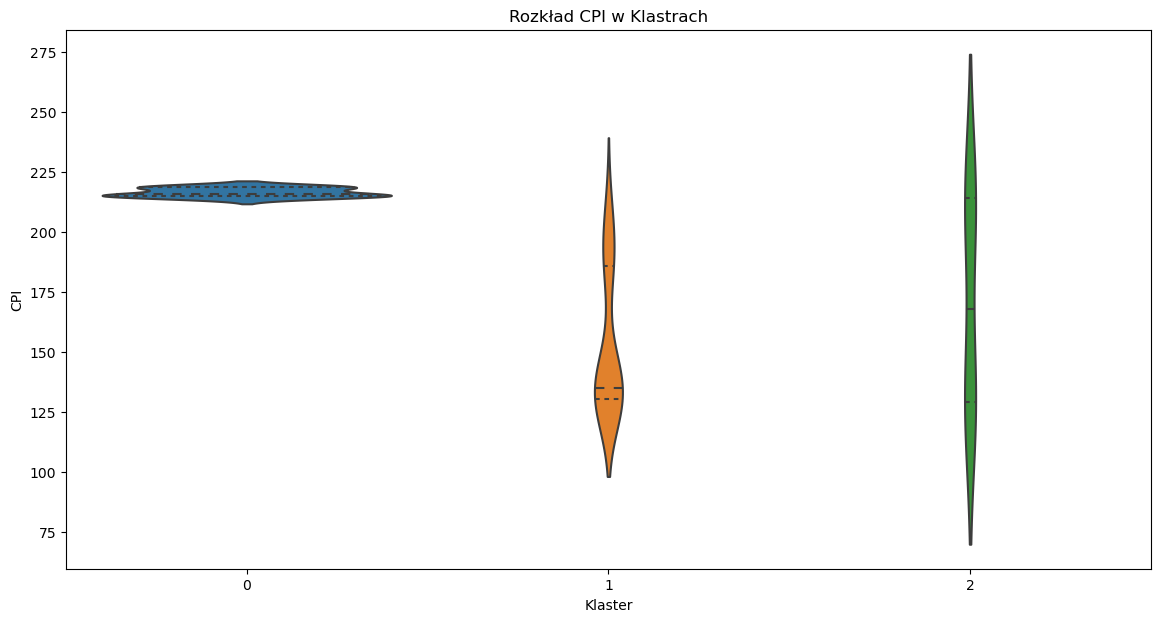

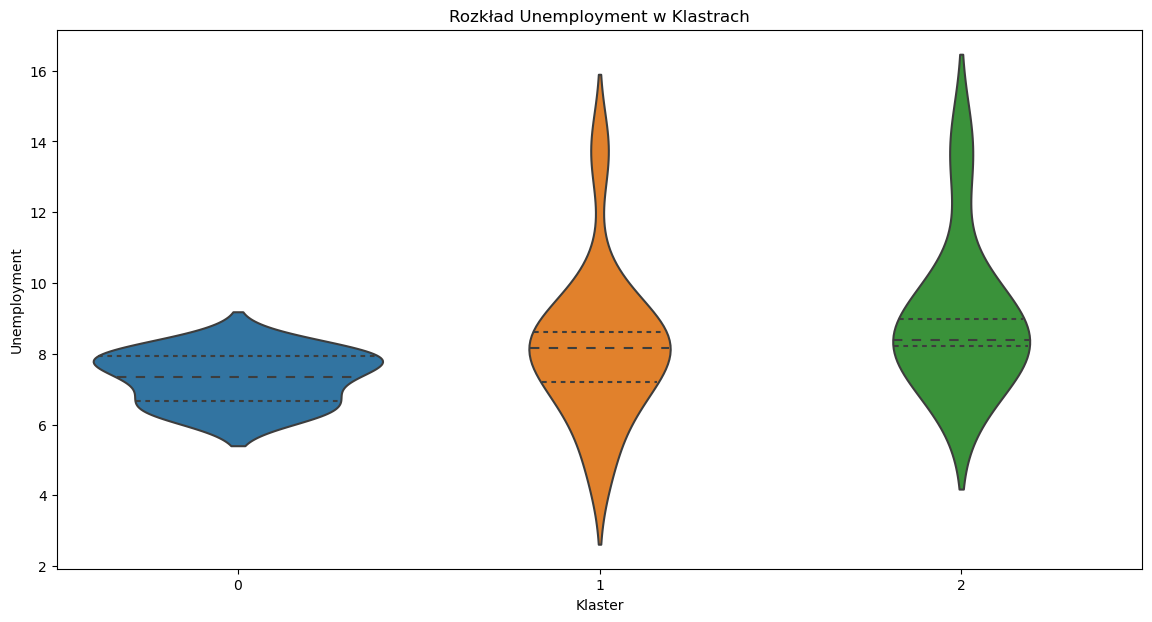

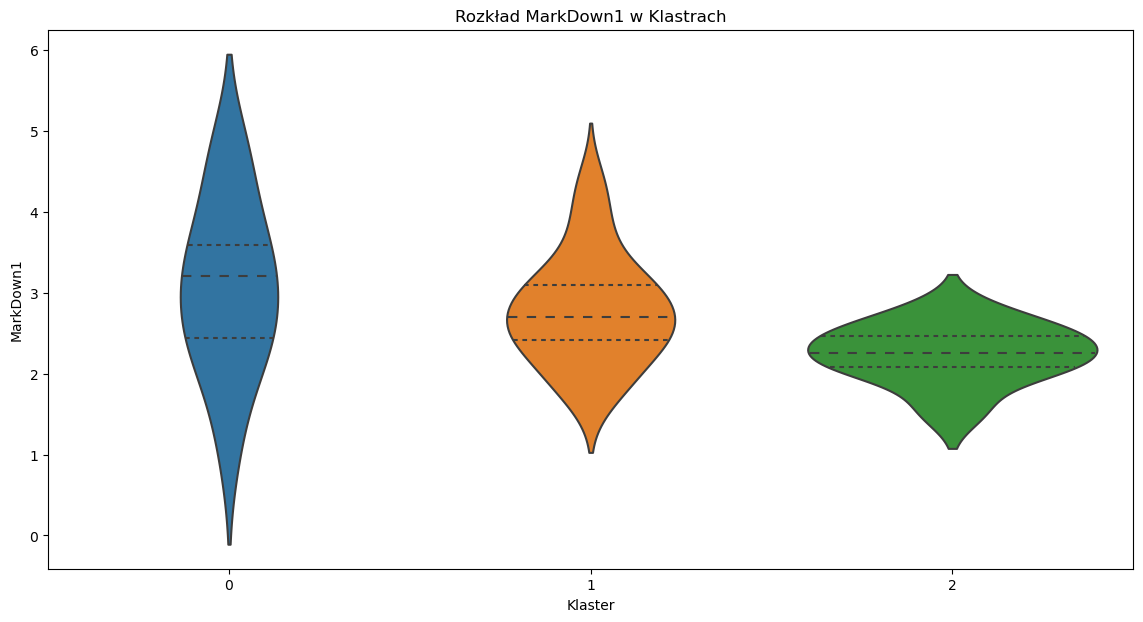

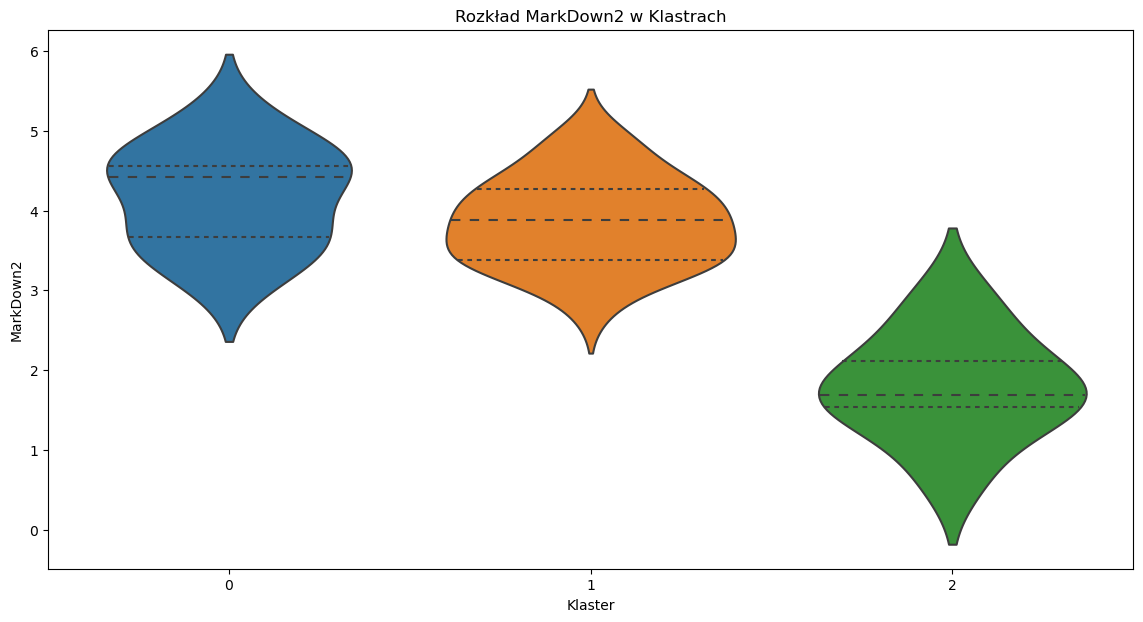

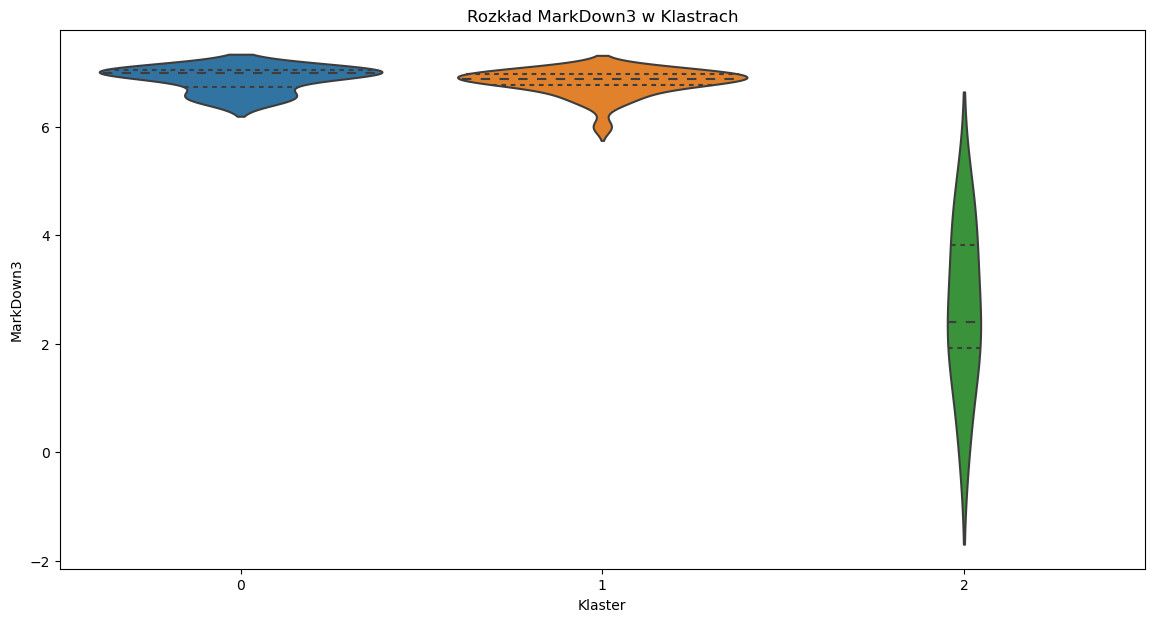

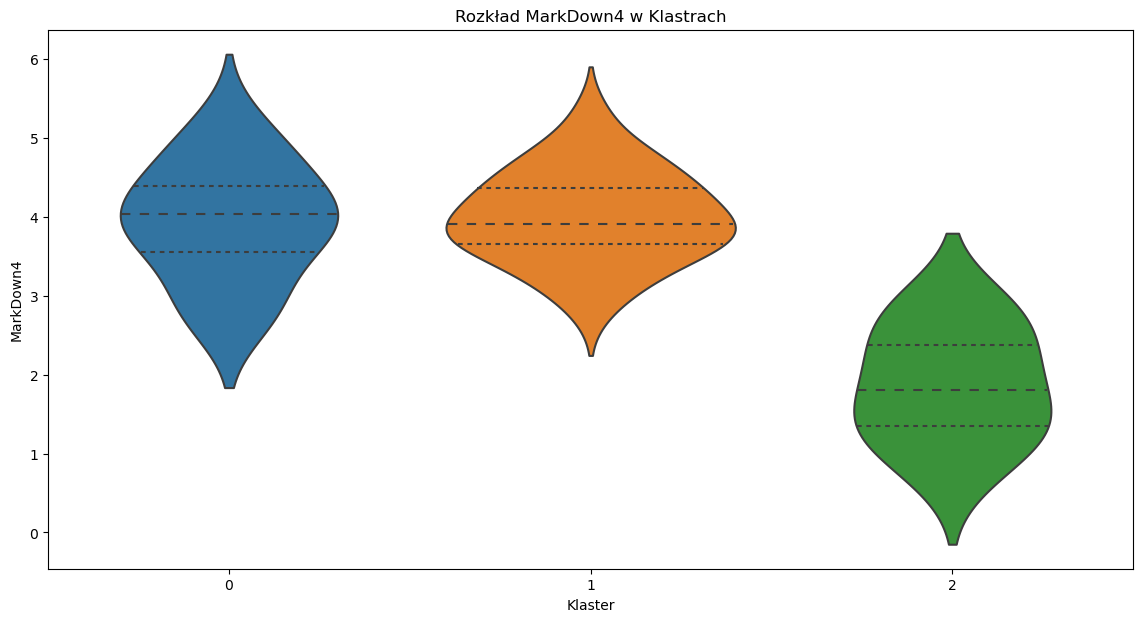

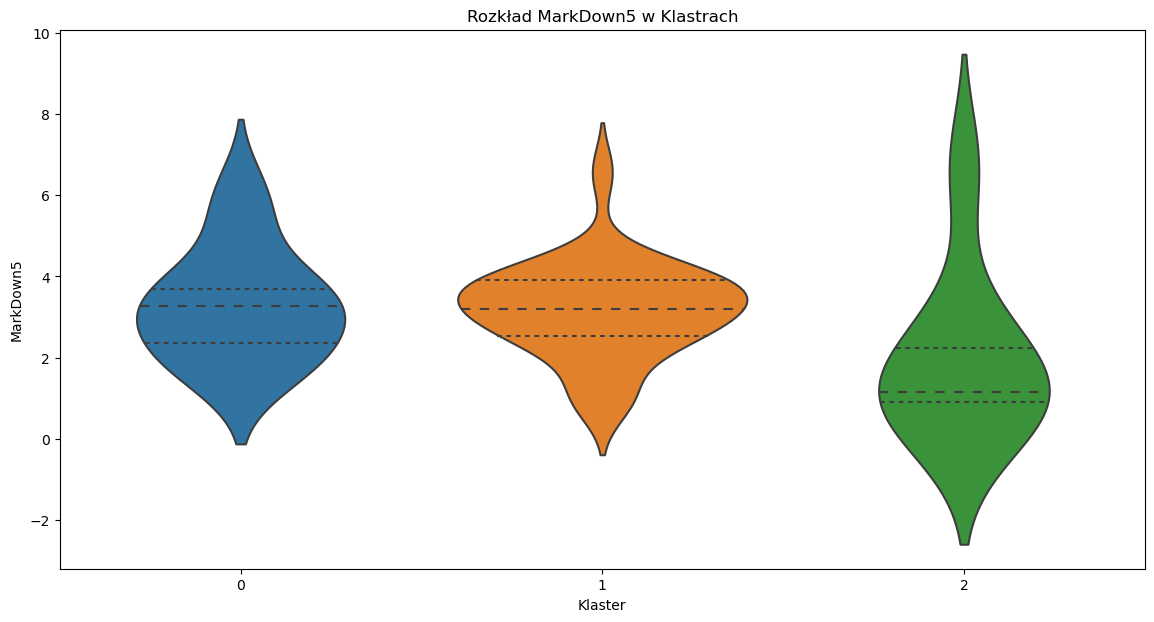

In [537]:
cluster_analysis = store_data.groupby('Cluster').agg({
    'Weekly_Sales': ['mean', 'median', 'std'],
    'Temperature': ['mean', 'median', 'std'],
    'Fuel_Price': ['mean', 'median', 'std'],
    'CPI': ['mean', 'median', 'std'],
    'Unemployment': ['mean', 'median', 'std'],
    'MarkDown1': 'skew',
    'MarkDown2': 'skew',
    'MarkDown3': 'skew',
    'MarkDown4': 'skew',
    'MarkDown5': 'mean'
}).reset_index()

# Spłaszczenie wielopoziomowego indeksu kolumn
cluster_analysis.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in cluster_analysis.columns.values]

print(cluster_analysis)
variables = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for variable in variables:
    plt.figure(figsize=(14, 7))
    sns.violinplot(x='Cluster', y=variable, data=store_data, inner='quartile')
    plt.title(f'Rozkład {variable} w Klastrach')
    plt.xlabel('Klaster')
    plt.ylabel(variable)
    plt.show()